In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import scipy
import sklearn
from scipy.stats import iqr
from math import sqrt

# загружаем необходимые библиотеки для работы с графикой
import seaborn as sns
import matplotlib.pyplot as plt

# загружаем необходимые библиотеки для нормализации данных
from sklearn.preprocessing import MinMaxScaler

# загружаем необходимые библиотеки для работы с моделями машинного обучения
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# метрики для определения качества моделей
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

# загружаем необходимые библиотеки для управления предупреждениями
import warnings
warnings.simplefilter(action='ignore', category=Warning)

%matplotlib inline
sns.set_style("darkgrid")

### Загружаем данные

In [3]:
# загружаем первый датасет
df1 = pd.read_excel('X_bp.xlsx')
df1

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [4]:
# переименуем первую колонку
df1 = df1.rename(columns = {'Unnamed: 0':'Index'})
df1 = df1.set_index('Index')
df1

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
0                             1.857143       2030.000000   
1                             1.857143       2030.000000   
2                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
...                                ...               ...   
1018                          2.271346       1952.087902   
1019                          3.444022       2050.089171   
1020                          3.280604       1972.372865   
1021                          3.705351       2066.799773   
1022                          3.808020       1890.413468   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
0                 738.736842                    30.000000   
1                 738.736842                    50.000000   
2                 738.736842                    49.900000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
...                      ...                          ...   
1018              912.855545                    86.992183   
1019              444.732634                   145.981978   
1020              416.836524                   110.533477   
1021              741.475517                   141.397963   
1022              417.316232                   129.183416   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
0                            22.267857                100.000000   
1                            23.750000                284.615385   
2                            33.000000                284.615385   
3                            21.250000                300.000000   
4                            22.267857                284.615385   
...                                ...                       ...   
1018                         20.123249                324.774576   
1019                         19.599769                254.215401   
1020                         23.957502                248.423047   
1021                         19.246945                275.779840   
1022                         27.474763                300.952708   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Index                                                                        
0                         210.000000                             70.000000   
1                         210.000000                             70.000000   
2                         210.000000                             70.000000   
3                         210.000000                             70.000000   
4                         210.000000                             70.000000   
...                              ...                                   ...   
1018                      209.198700                             73.090961   
1019                      350.660830                             72.920827   
1020                      740.142791                             74.734344   
1021                      641.468152                             74.042708   
1022                      758.747882                             74.309704   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
Index                                                          
0                        3000.000000               220.000000  
1                        3000.000000               220.000000  
2                        3000.000000               220.000000  
3                        3000.000000               220.000000  
4                        3000.000000               220.000000  
...                              ...                      ...  
1018                

In [5]:
# загрузим второй датасет
df2 = pd.read_excel('X_nup.xlsx')
df2

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

In [6]:
# переименуем первую колонку
df2 = df2.rename(columns = {'Unnamed: 0':'Index'})
df2 = df2.set_index('Index')
df2

Угол нашивки, град  Шаг нашивки  Плотность нашивки
Index                                                    
0                       0     4.000000          57.000000
1                       0     4.000000          60.000000
2                       0     4.000000          70.000000
3                       0     5.000000          47.000000
4                       0     5.000000          57.000000
...                   ...          ...                ...
1035                   90     8.088111          47.759177
1036                   90     7.619138          66.931932
1037                   90     9.800926          72.858286
1038                   90    10.079859          65.519479
1039                   90     9.021043          66.920143

[1040 rows x 3 columns]

In [7]:
# Объединяем по индексу,  тип объединения INNER
df3 = pd.merge(df1,df2, how = 'inner', on = 'Index')
df3

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
0                             1.857143       2030.000000   
1                             1.857143       2030.000000   
2                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
...                                ...               ...   
1018                          2.271346       1952.087902   
1019                          3.444022       2050.089171   
1020                          3.280604       1972.372865   
1021                          3.705351       2066.799773   
1022                          3.808020       1890.413468   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
0                 738.736842                    30.000000   
1                 738.736842                    50.000000   
2                 738.736842                    49.900000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
...                      ...                          ...   
1018              912.855545                    86.992183   
1019              444.732634                   145.981978   
1020              416.836524                   110.533477   
1021              741.475517                   141.397963   
1022              417.316232                   129.183416   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
0                            22.267857                100.000000   
1                            23.750000                284.615385   
2                            33.000000                284.615385   
3                            21.250000                300.000000   
4                            22.267857                284.615385   
...                                ...                       ...   
1018                         20.123249                324.774576   
1019                         19.599769                254.215401   
1020                         23.957502                248.423047   
1021                         19.246945                275.779840   
1022                         27.474763                300.952708   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Index                                                                        
0                         210.000000                             70.000000   
1                         210.000000                             70.000000   
2                         210.000000                             70.000000   
3                         210.000000                             70.000000   
4                         210.000000                             70.000000   
...                              ...                                   ...   
1018                      209.198700                             73.090961   
1019                      350.660830                             72.920827   
1020                      740.142791                             74.734344   
1021                      641.468152                             74.042708   
1022                      758.747882                             74.309704   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
Index                                                           
0                        3000.000000               220.000000   
1                        3000.000000               220.000000   
2                        3000.000000               220.000000   
3                        3000.000000               220.000000   
4                        3000.000000               220.000000   
...                              ...                      ...   
1018        

### Разведочный анализ данных

In [8]:
# выведем наименования всех колонок датасета
df3.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [9]:
# выведем информацию о датасете.
# 12 колонок, пропущенных значений нет, тип данных float64 и int64
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [10]:
print("В датасете ", df3.shape[0], "строки и ", df3.shape[1], "столбцов.")

В датасете  1023 строки и  13 столбцов.


In [11]:
# количество пропущенных значений в датасете
df3.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [12]:
# Выведем общие статистические данные по датасету( количество записей, среднее значение по каждой колонке, 
# стандартное отклонение, минимальный элемент, максимальный элемент и некоторые другие детали)
df3.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [13]:
# количество дубликатов в датасете
df3.duplicated().sum()

0

### Гистограммы распределения каждой из переменной. Диаграммы ящика с усами
Гистограммы показывают, что данные распределены нормально ( колоколообразная форма). Это означает, что большинство значений близко к меридиане. Диаграмма «ящик с усами» показывает: насколько данные сконцентрированы; на каком расстоянии от большинства данных находятся точки экстремума.

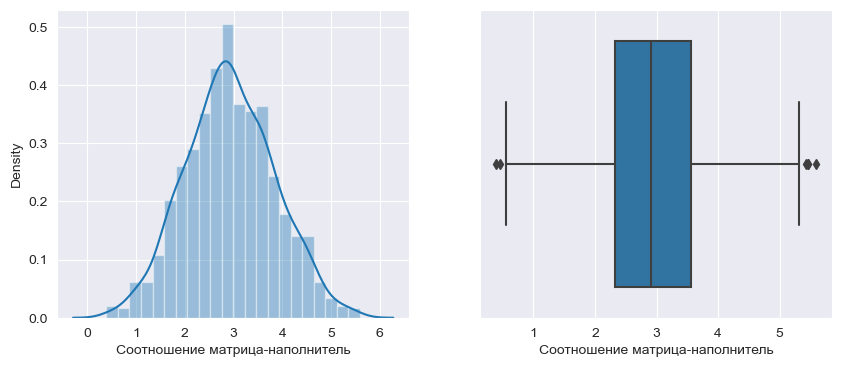

In [14]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Соотношение матрица-наполнитель'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Соотношение матрица-наполнитель']);


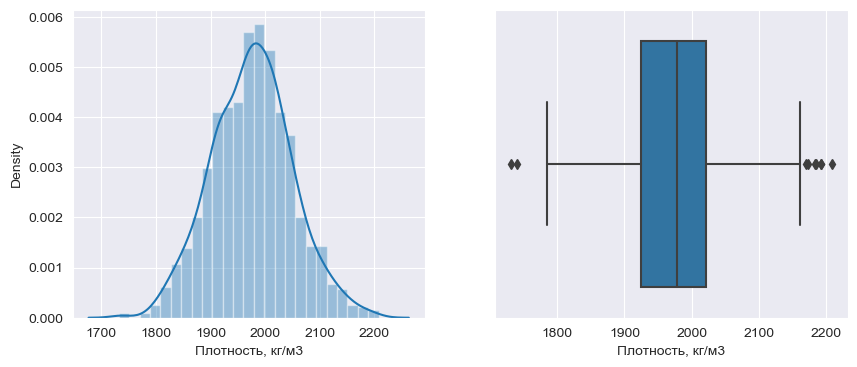

In [15]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Плотность, кг/м3'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Плотность, кг/м3']);


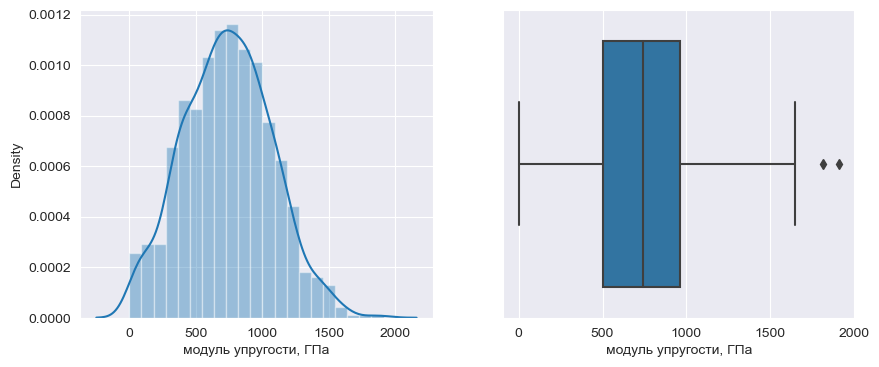

In [16]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['модуль упругости, ГПа'])

ax=fig.add_subplot(122)
sns.boxplot(df3['модуль упругости, ГПа']);

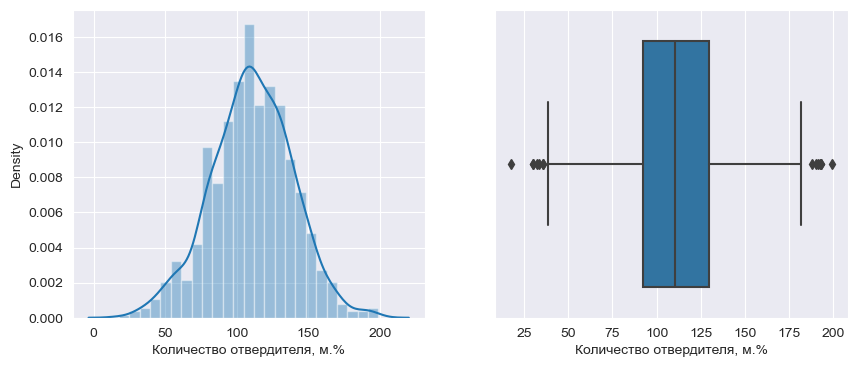

In [17]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Количество отвердителя, м.%'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Количество отвердителя, м.%']);

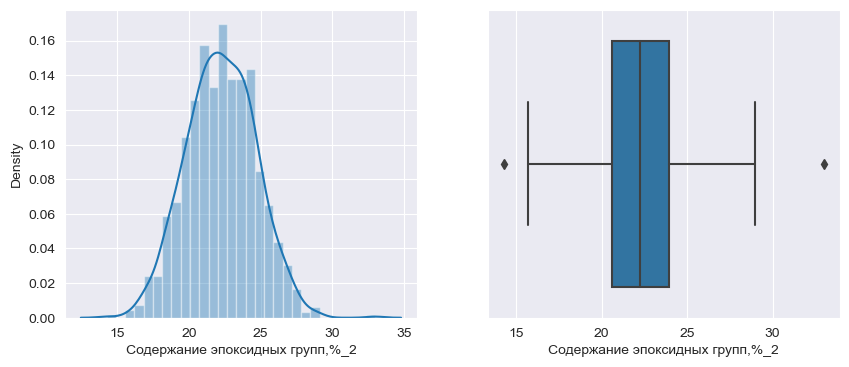

In [18]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Содержание эпоксидных групп,%_2'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Содержание эпоксидных групп,%_2']);

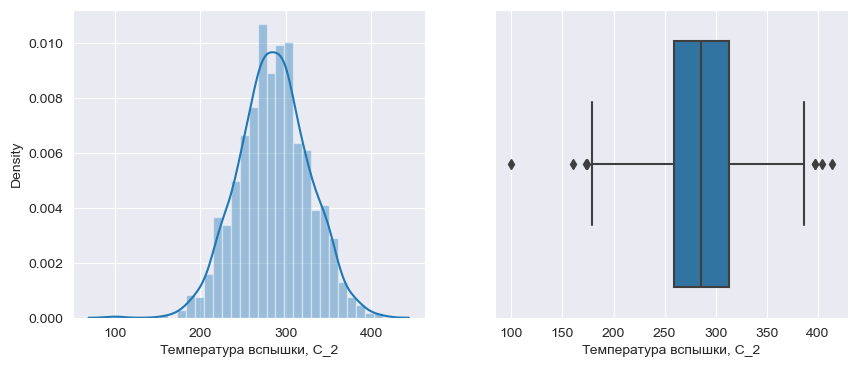

In [19]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Температура вспышки, С_2'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Температура вспышки, С_2']);

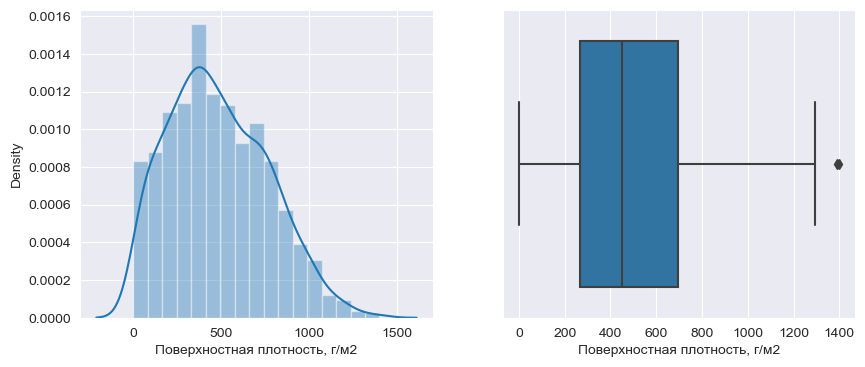

In [20]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Поверхностная плотность, г/м2'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Поверхностная плотность, г/м2']);

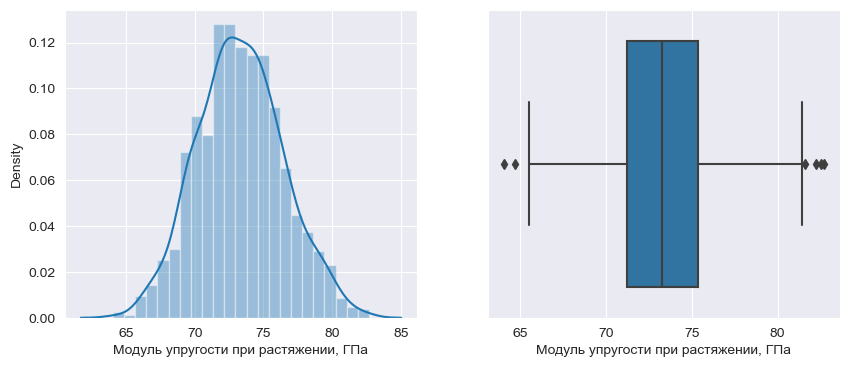

In [21]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Модуль упругости при растяжении, ГПа'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Модуль упругости при растяжении, ГПа']);

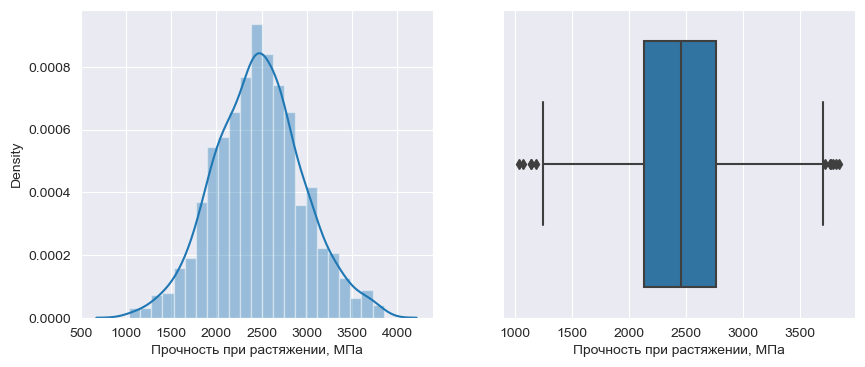

In [22]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Прочность при растяжении, МПа'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Прочность при растяжении, МПа']);

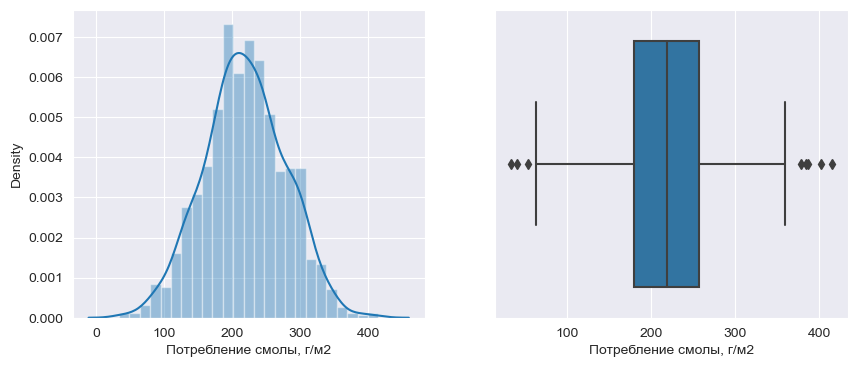

In [23]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Потребление смолы, г/м2'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Потребление смолы, г/м2']);

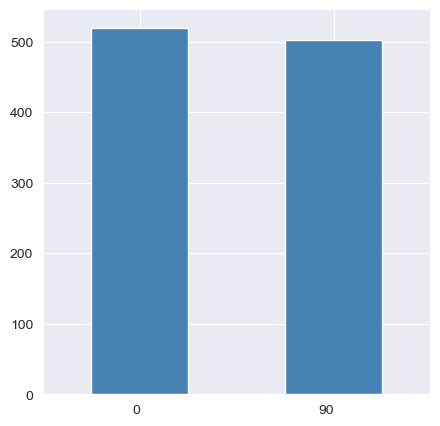

In [24]:
df3['Угол нашивки, град'].value_counts().plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.xticks(rotation=0, ha='right');

In [25]:
df3['Угол нашивки, град'].value_counts()

0     520
90    503
Name: Угол нашивки, град, dtype: int64

Видим, что для данного категориального признака использовать алгоритмы UNDERSAMPLING, OVERSAMPLING нет необходимости.

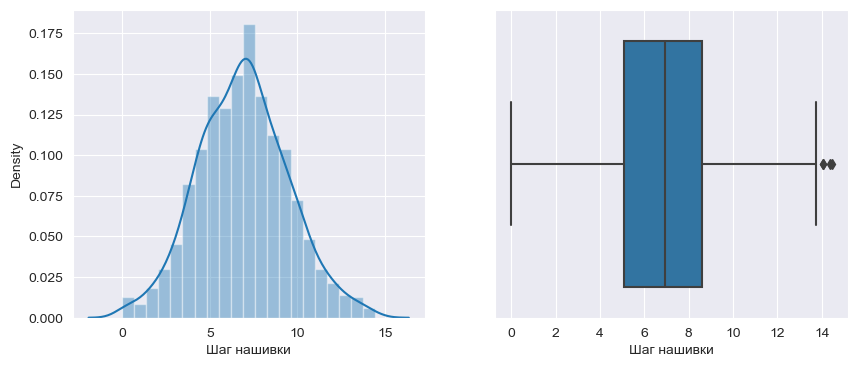

In [26]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Шаг нашивки'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Шаг нашивки']);

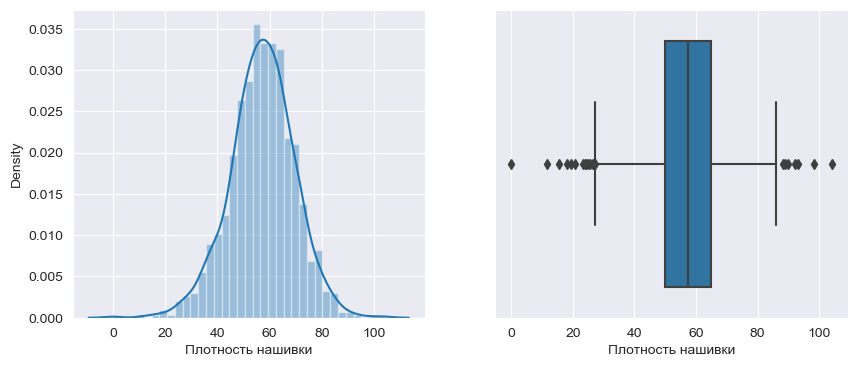

In [27]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df3['Плотность нашивки'])

ax=fig.add_subplot(122)
sns.boxplot(df3['Плотность нашивки']);

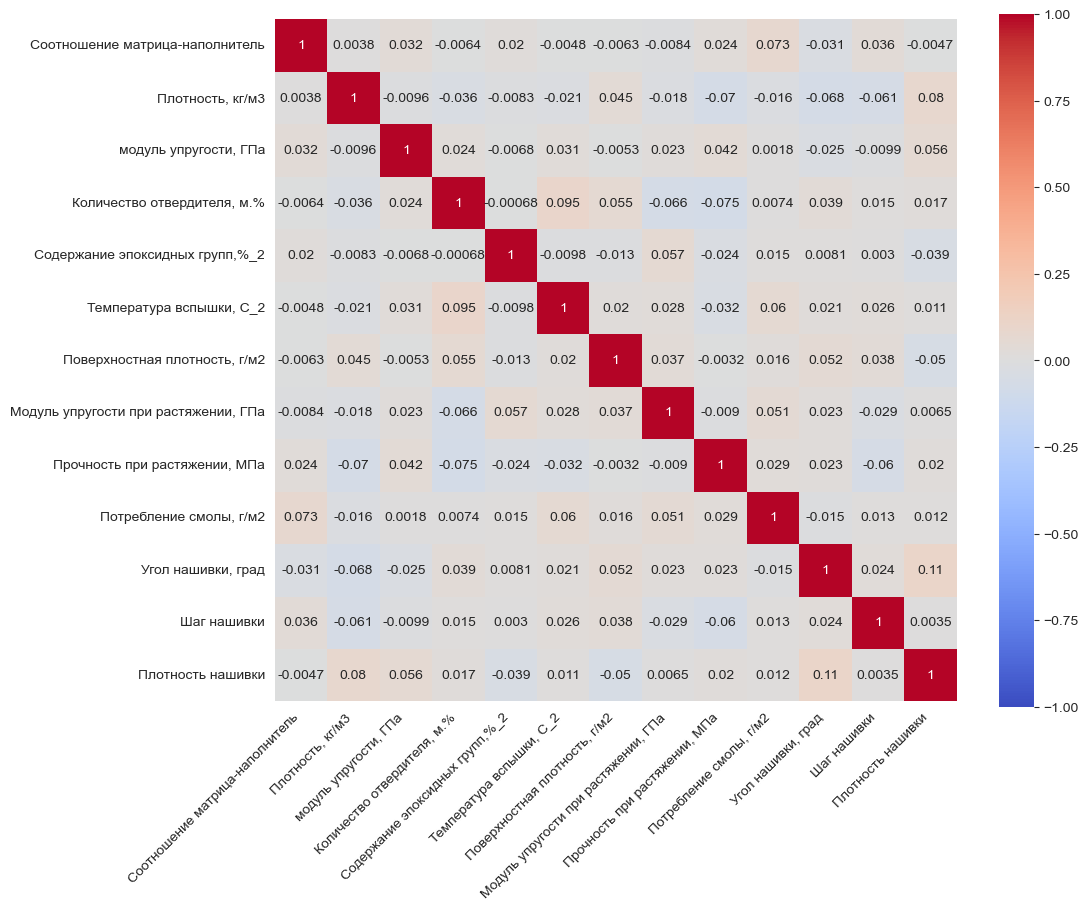

In [28]:
# построив тепловую карту, видим, что между параметрами очень слабая корреляция
# чем ближе корреляция к 1 или -1, тем она выше, значит, есть влияние и зависимость одних 
# параметров и других. В нашем случае самая высокая корреляция 0.11 обнаруживается между 
# углом нашивки и плотностью нашивки.
plt.figure(figsize=(11,9))
sns.heatmap(
    df3.corr(),        
    cmap='coolwarm', 
    annot=True, 
    vmin=-1, vmax=1, square = True,)
plt.xticks(rotation=45, ha='right'); 

### Попарные графики рассеяния точек

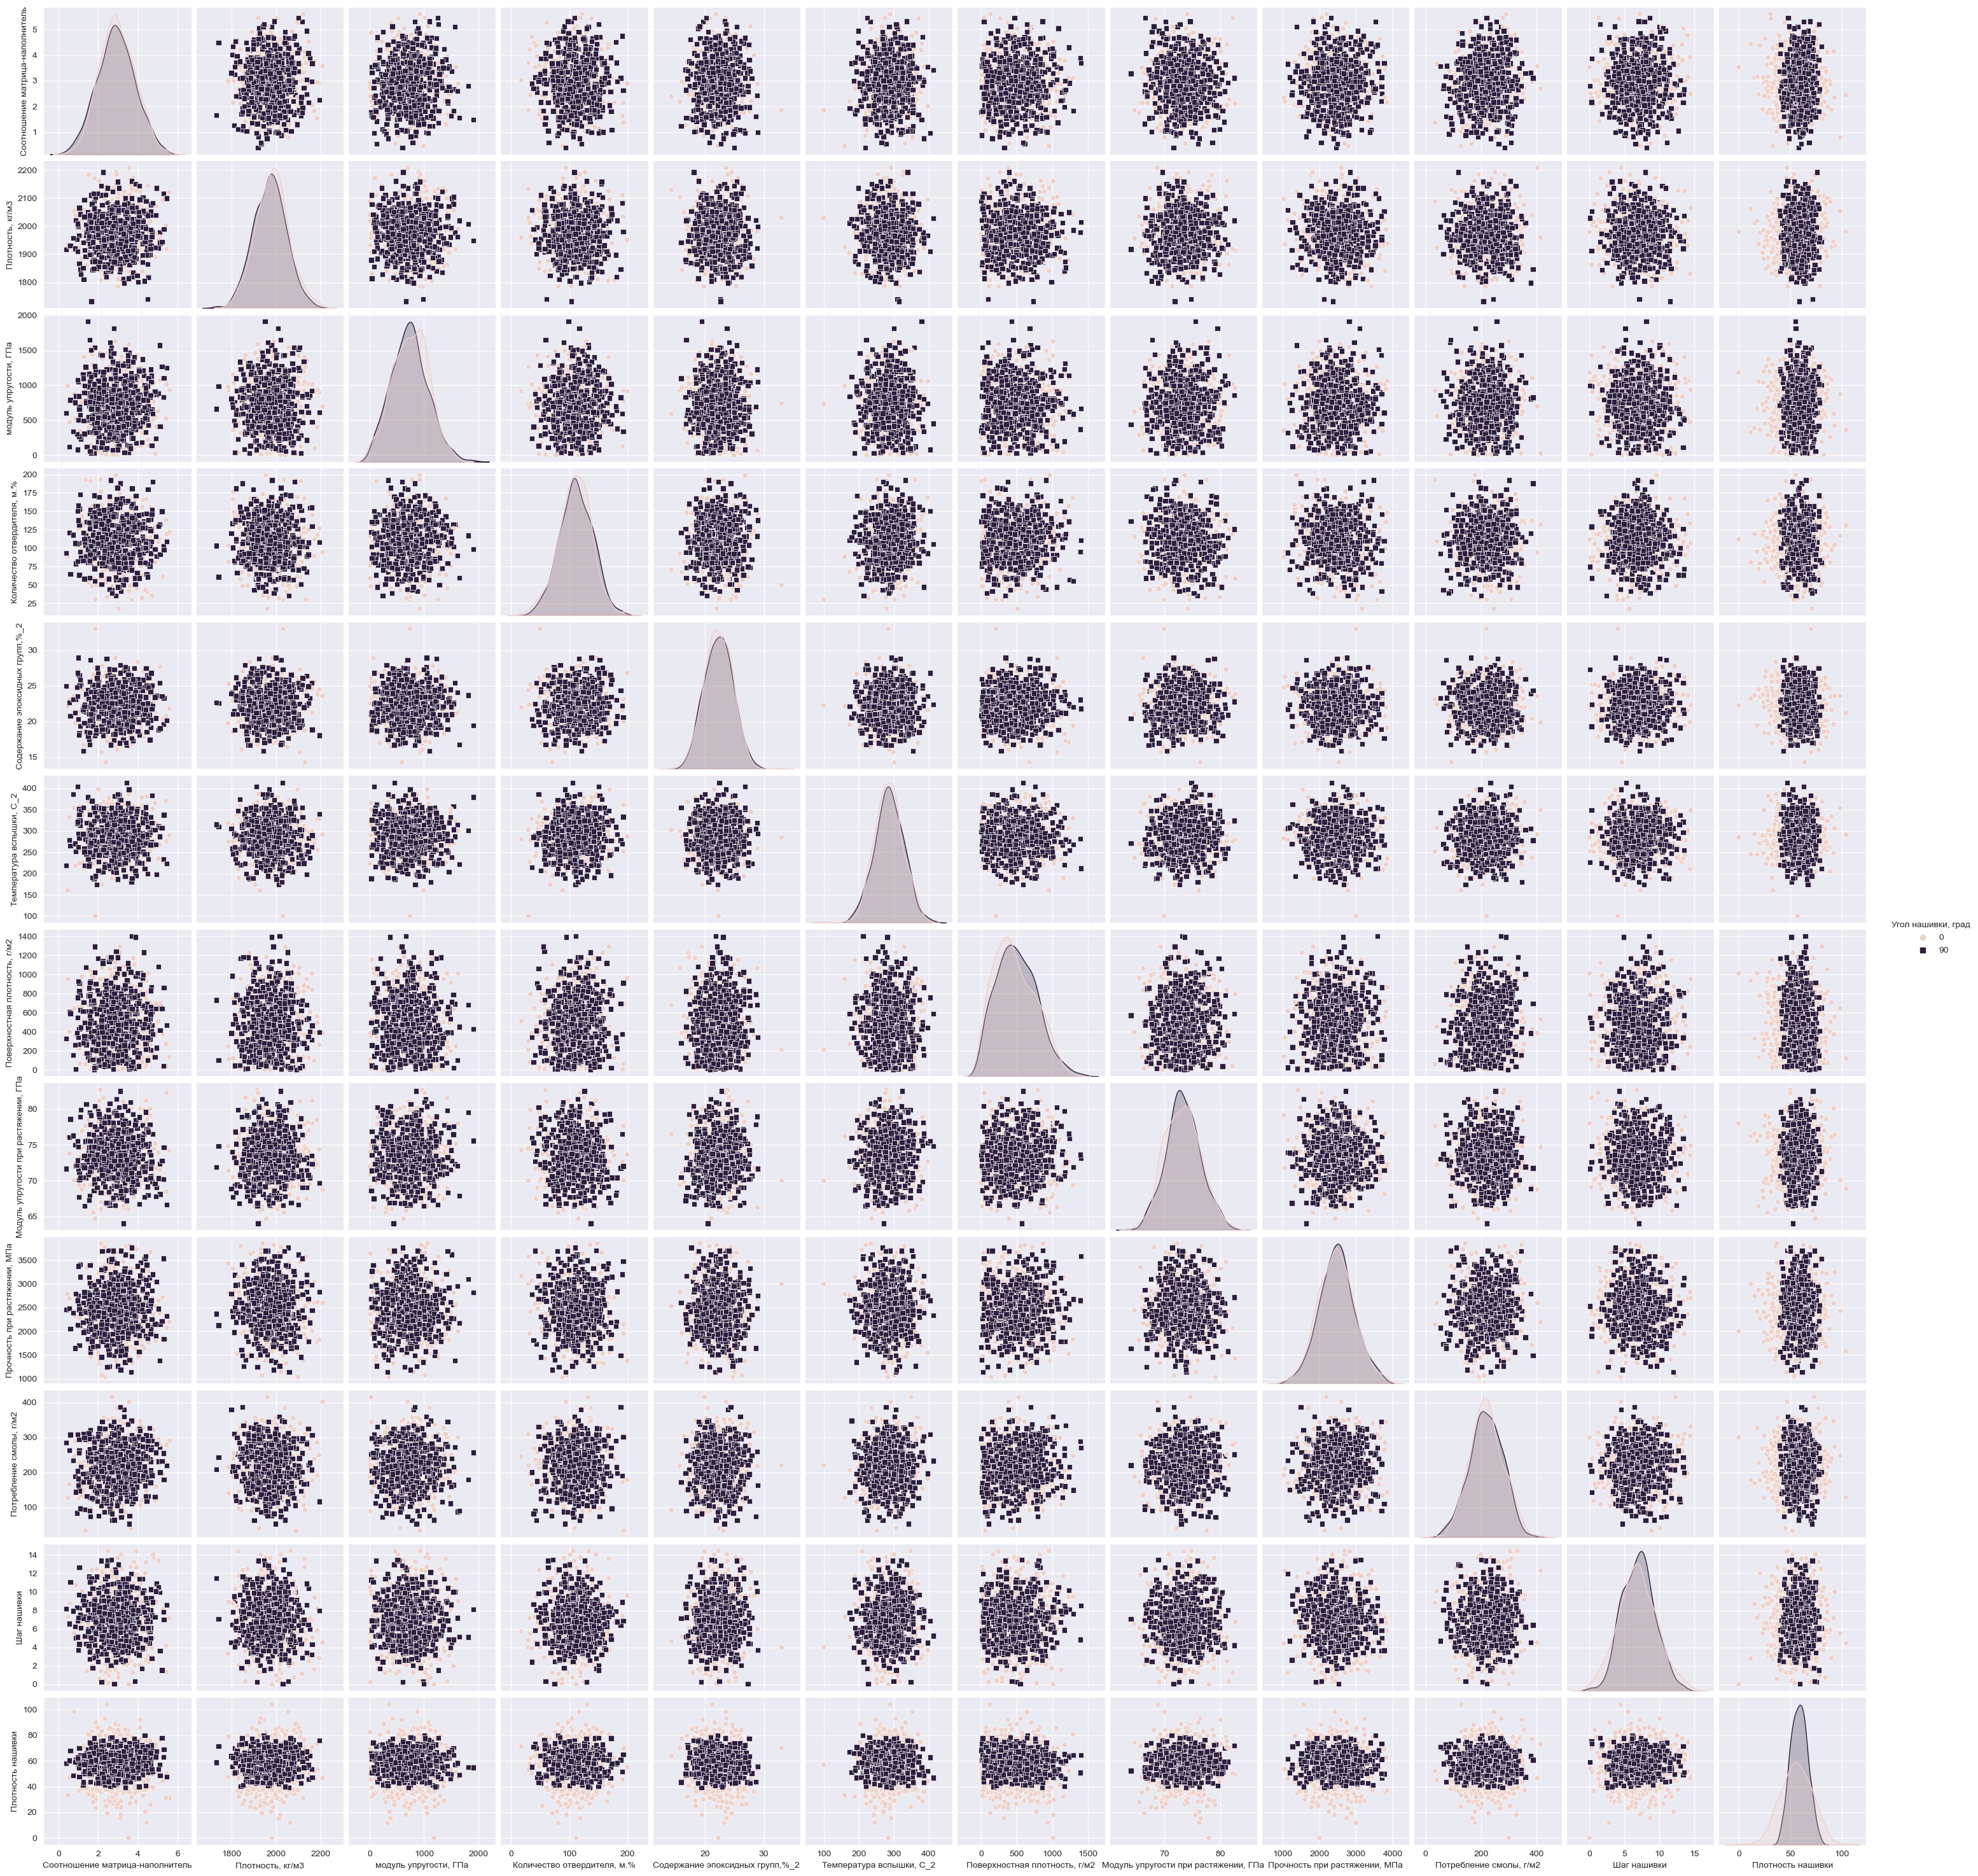

In [28]:
sns.pairplot (df3, hue = 'Угол нашивки, град', markers=["o", "s"], )

Распределение каждой переменной показано в виде гистограммы в прямоугольниках по диагонали.
Во всех остальных полях отображается диаграмма рассеяния отношений между каждой парной комбинацией переменных. 

In [29]:
# Получим для каждой колонки среднее и медианное значение 
# (кроме колонки "Угол нашивки", так как это категориальная переменная)
print('1. Соотношение матрица-наполнитель:                   mean = ',round(df3['Соотношение матрица-наполнитель'].mean(),2), ',    median = ',
round(df3['Соотношение матрица-наполнитель'].median(),2))
print('2. Плотность, кг/м3:                                  mean = ',round(df3['Плотность, кг/м3'].mean(),2), ', median = ',
round(df3['Плотность, кг/м3'].median(),2))
print('3. Модуль упругости, ГПа:                             mean = ',round(df3['модуль упругости, ГПа'].mean(),2), ',  median = ',
round(df3['модуль упругости, ГПа'].median(),2))
print('4. Количество отвердителя, м.%:                       mean = ',round(df3['Количество отвердителя, м.%'].mean(),2), ',  median = ',
round(df3['Количество отвердителя, м.%'].median(),2))
print('5. Содержание эпоксидных групп,%_2:                   mean = ',round(df3['Содержание эпоксидных групп,%_2'].mean(),2), ',   median = ',
round(df3['Содержание эпоксидных групп,%_2'].median(),2))
print('6. Температура вспышки, С_2:                          mean = ',round(df3['Температура вспышки, С_2'].mean(),2), ',  median = ',
round(df3['Температура вспышки, С_2'].median(),2))
print('7. Поверхностная плотность, г/м2:                     mean = ',round(df3['Поверхностная плотность, г/м2'].mean(),2), ',  median = ',
round(df3['Поверхностная плотность, г/м2'].median(),2))
print('8. Модуль упругости при растяжении, ГПа:              mean = ',round(df3['Модуль упругости при растяжении, ГПа'].mean(),2), ',   median = ',
round(df3['Модуль упругости при растяжении, ГПа'].median(),2))
print('9. Прочность при растяжении, МПа:                     mean = ',round(df3['Прочность при растяжении, МПа'].mean(),2), ', median = ',
round(df3['Прочность при растяжении, МПа'].median(),2))
print('10. Потребление смолы, г/м2:                          mean = ',round(df3['Потребление смолы, г/м2'].mean(),2), ',  median = ',
round(df3['Потребление смолы, г/м2'].median(),2))
print('11. Шаг нашивки:                                      mean = ',round(df3['Шаг нашивки'].mean(),2), ',     median = ',
round(df3['Шаг нашивки'].median(),2))
print('12. Плотность нашивки:                                mean = ',round(df3['Плотность нашивки'].mean(),2), ',   median = ',
round(df3['Плотность нашивки'].median(),2))

1. Соотношение матрица-наполнитель:                   mean =  2.93 ,    median =  2.91
2. Плотность, кг/м3:                                  mean =  1975.73 , median =  1977.62
3. Модуль упругости, ГПа:                             mean =  739.92 ,  median =  739.66
4. Количество отвердителя, м.%:                       mean =  110.57 ,  median =  110.56
5. Содержание эпоксидных групп,%_2:                   mean =  22.24 ,   median =  22.23
6. Температура вспышки, С_2:                          mean =  285.88 ,  median =  285.9
7. Поверхностная плотность, г/м2:                     mean =  482.73 ,  median =  451.86
8. Модуль упругости при растяжении, ГПа:              mean =  73.33 ,   median =  73.27
9. Прочность при растяжении, МПа:                     mean =  2466.92 , median =  2459.52
10. Потребление смолы, г/м2:                          mean =  218.42 ,  median =  219.2
11. Шаг нашивки:                                      mean =  6.9 ,     median =  6.92
12. Плотность нашивки:     

### Удаление выбросов
Выбросы — это те значения данных, которые находятся за пределами следующих интервалов: Q1–1.5 x IQR и Q3 + 1.5 x IQR

Модуль упругости

In [29]:
# IQR — это разница между Q3 и Q1. IQR = Q3 - Q1 IQR. 
IQR = iqr(df3['модуль упругости, ГПа'])
Q3 = np.percentile(df3['модуль упругости, ГПа'], 75,
                   interpolation = 'midpoint')
upper = Q3 + 1.5 * IQR
norm_list = [x for x in df3['модуль упругости, ГПа'] if (x < upper)]
df4 = df3.loc[df3['модуль упругости, ГПа'].isin(norm_list)]
df4.shape

(1021, 13)

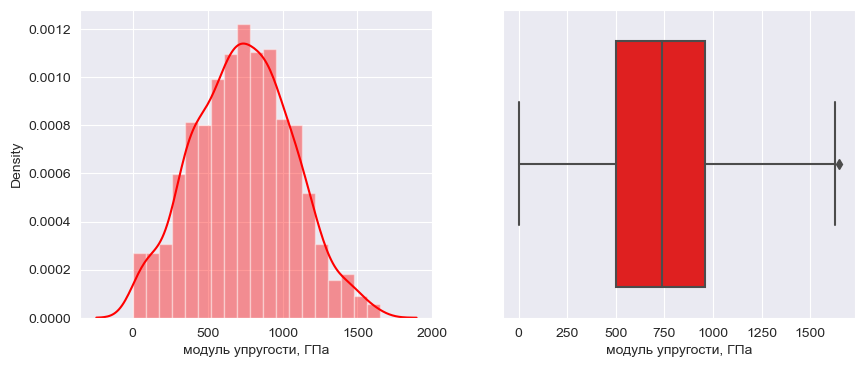

In [37]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df4['модуль упругости, ГПа'],  color='red')

ax=fig.add_subplot(122)
sns.boxplot(df4['модуль упругости, ГПа'],  color='red');

Содержание эпоксидных групп,%_2

In [39]:
IQR = iqr(df4['Содержание эпоксидных групп,%_2'])
Q1 = np.percentile(df4['Содержание эпоксидных групп,%_2'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df4['Содержание эпоксидных групп,%_2'], 75,
                   interpolation = 'midpoint')
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
norm_list = [x for x in df4['Содержание эпоксидных групп,%_2'] if (
        (x > lower) & (x < upper))]
df5 = df4.loc[df4['Содержание эпоксидных групп,%_2'].isin(norm_list)]
df5.shape

(1019, 13)

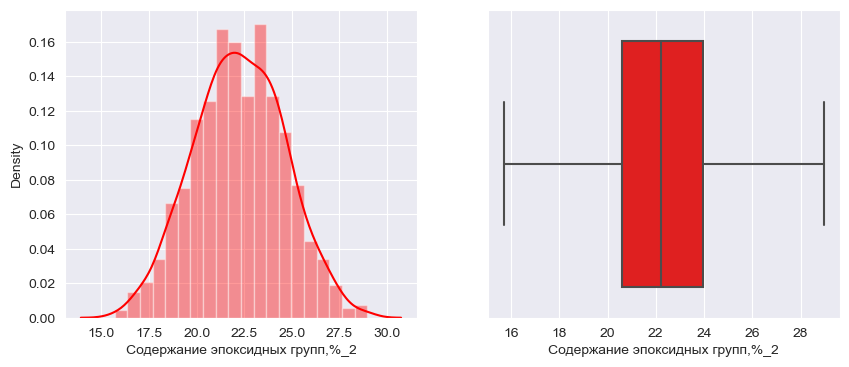

In [40]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df5['Содержание эпоксидных групп,%_2'],  color='red')

ax=fig.add_subplot(122)
sns.boxplot(df5['Содержание эпоксидных групп,%_2'],  color='red');

Температура вспышки, С_2

In [41]:
IQR = iqr(df5['Температура вспышки, С_2'])
Q1 = np.percentile(df5['Температура вспышки, С_2'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df5['Температура вспышки, С_2'], 75,
                   interpolation = 'midpoint')
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
norm_list = [x for x in df5['Температура вспышки, С_2'] if (
        (x > lower) & (x < upper))]
df6 = df5.loc[df5['Температура вспышки, С_2'].isin(norm_list)]
df6.shape

(1011, 13)

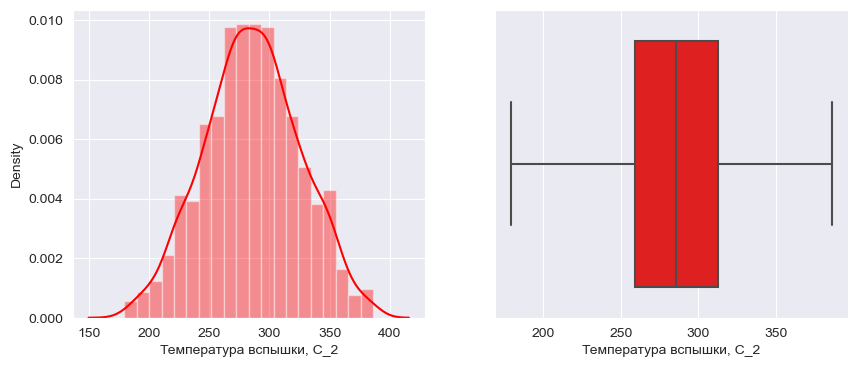

In [42]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns_plot = sns.distplot(df6['Температура вспышки, С_2'],  color='red')

ax=fig.add_subplot(122)
sns.boxplot(df6['Температура вспышки, С_2'],  color='red');

Плотность нашивки

In [43]:
IQR = iqr(df6['Плотность нашивки'])
Q1 = np.percentile(df6['Плотность нашивки'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df6['Плотность нашивки'], 75,
                   interpolation = 'midpoint')
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
norm_list = [x for x in df6['Плотность нашивки'] if (
        (x > lower) & (x < upper))]
df7 = df6.loc[df6['Плотность нашивки'].isin(norm_list)]
df7.shape

(990, 13)

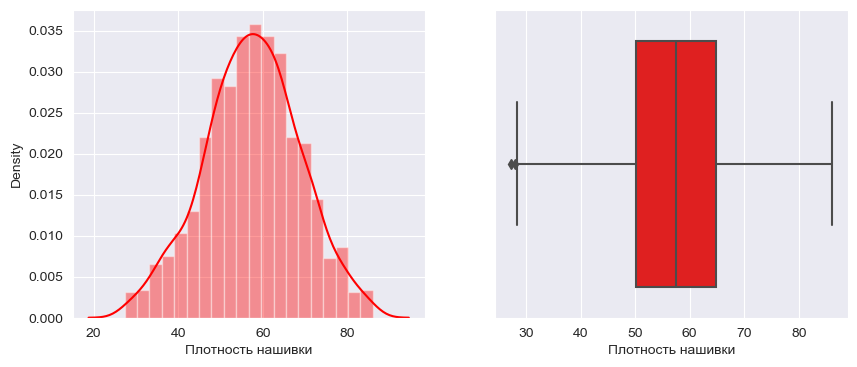

In [44]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns.distplot(df7['Плотность нашивки'],  color='red')

ax=fig.add_subplot(122)
sns.boxplot(df7['Плотность нашивки'],  color='red');



In [45]:
df7

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Index                                                      
1                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
5                             2.767918       2000.000000   
6                             2.569620       1910.000000   
...                                ...               ...   
1018                          2.271346       1952.087902   
1019                          3.444022       2050.089171   
1020                          3.280604       1972.372865   
1021                          3.705351       2066.799773   
1022                          3.808020       1890.413468   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
Index                                                       
1                 738.736842                    50.000000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
5                 748.000000                   111.860000   
6                 807.000000                   111.860000   
...                      ...                          ...   
1018              912.855545                    86.992183   
1019              444.732634                   145.981978   
1020              416.836524                   110.533477   
1021              741.475517                   141.397963   
1022              417.316232                   129.183416   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Index                                                              
1                            23.750000                284.615385   
3                            21.250000                300.000000   
4                            22.267857                284.615385   
5                            22.267857                284.615385   
6                            22.267857                284.615385   
...                                ...                       ...   
1018                         20.123249                324.774576   
1019                         19.599769                254.215401   
1020                         23.957502                248.423047   
1021                         19.246945                275.779840   
1022                         27.474763                300.952708   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Index                                                                        
1                         210.000000                             70.000000   
3                         210.000000                             70.000000   
4                         210.000000                             70.000000   
5                         210.000000                             70.000000   
6                         210.000000                             70.000000   
...                              ...                                   ...   
1018                      209.198700                             73.090961   
1019                      350.660830                             72.920827   
1020                      740.142791                             74.734344   
1021                      641.468152                             74.042708   
1022                      758.747882                             74.309704   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
Index                                                           
1                        3000.000000               220.000000   
3                        3000.000000               220.000000   
4                        3000.000000               220.000000   
5                        3000.000000               220.000000   
6                        3000.000000               220.000000   
...                              ...                      ...   
1018        

В нашем датасете после удаления выбросов осталось 990 строк. Этого достаточно для дальнейшей работы. С выбросами мы удалили всего 4% данных.

### Нормализация данных

В датасете есть значения, которые исчисляются в единицах, а есть значения, исчисляемые в тысячах. Чтобы с ними было удобно работать, нужно провести нормализацию — привести различные данные в самых разных единицах измерения и диапазонах значений к единому виду, который позволит сравнивать их между собой или использовать для расчёта схожести объектов.

In [46]:
minmax_scaler = MinMaxScaler()

In [47]:
# применяем нормализацию
df_norm = minmax_scaler.fit_transform(np.array(df7))
df_norm

array([[0.28213084, 0.62653324, 0.44706097, ..., 0.        , 0.27510888,
        0.55715613],
       [0.28213084, 0.62653324, 0.44706097, ..., 0.        , 0.34453943,
        0.33583998],
       [0.45785722, 0.62653324, 0.45572116, ..., 0.        , 0.34453943,
        0.50608317],
       ...,
       [0.55575038, 0.50547008, 0.25161199, ..., 1.        , 0.28629789,
        0.68704631],
       [0.63739572, 0.70384225, 0.44872381, ..., 1.        , 0.43571567,
        0.5275521 ],
       [0.65713085, 0.33328967, 0.25190326, ..., 1.        , 0.41944815,
        0.85396608]])

In [48]:
# выводим нормализованный датасет
df_norm_df = pd.DataFrame(data = df_norm, columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки', 'Плотность нашивки'])
df_norm_df

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.282131          0.626533               0.447061   
1                           0.282131          0.626533               0.447061   
2                           0.457857          0.626533               0.455721   
3                           0.457201          0.563509               0.452685   
4                           0.419084          0.374437               0.488508   
..                               ...               ...                    ...   
985                         0.361750          0.462855               0.552781   
986                         0.587163          0.668737               0.268550   
987                         0.555750          0.505470               0.251612   
988                         0.637396          0.703842               0.448724   
989                         0.657131          0.333290               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.178021                         0.607435   
1                       0.613972                         0.418887   
2                       0.519387                         0.495653   
3                       0.519387                         0.495653   
4                       0.519387                         0.495653   
..                           ...                              ...   
985                     0.382158                         0.333908   
986                     0.707685                         0.294428   
987                     0.512067                         0.623085   
988                     0.682389                         0.267818   
989                     0.614984                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.509164                       0.149682   
1                    0.583596                       0.149682   
2                    0.509164                       0.149682   
3                    0.509164                       0.149682   
4                    0.509164                       0.149682   
..                        ...                            ...   
985                  0.703458                       0.149109   
986                  0.362087                       0.250230   
987                  0.334063                       0.528643   
988                  0.466417                       0.458108   
989                  0.588206                       0.541942   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.319194                       0.698235   
1                                0.319194                       0.698235   
2                                0.319194                       0.698235   
3                                0.319194                       0.698235   
4                                0.319194                       0.698235   
..                                    ...                            ...   
985                              0.485125                       0.480312   
986                              0.475992                       0.470745   
987                              0.573346                       0.578340   
988                              0.536217                       0.368070   
989                              0.550550                       0.647135   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.488979                 0.0     0.275109   
1                   0.488979                 0.0     0.344539   
2                   0.488979                 0.0     0.344539   
3                   0.488979                 0.0     0.344539   
4                   0.488979                 0.0     0.344539   
..                       ...                 ...          ...   
985                 0.239516                 1.0     0.627565   
9

Теперь все значения находятся в диапазоне от 0 до 1.

In [49]:
# Снова выведем общие статистические данные по датасету
# Теперь разница между средним арифметическим и медианой практически не заметна
df_norm_df.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       990.0  0.490171  0.174705  0.0   
Плотность, кг/м3                      990.0  0.512143  0.155353  0.0   
модуль упругости, ГПа                 990.0  0.446680  0.198786  0.0   
Количество отвердителя, м.%           990.0  0.514348  0.155730  0.0   
Содержание эпоксидных групп,%_2       990.0  0.492322  0.179336  0.0   
Температура вспышки, С_2              990.0  0.515877  0.191180  0.0   
Поверхностная плотность, г/м2         990.0  0.343991  0.201677  0.0   
Модуль упругости при растяжении, ГПа  990.0  0.497039  0.166423  0.0   
Прочность при растяжении, МПа         990.0  0.508326  0.173281  0.0   
Потребление смолы, г/м2               990.0  0.484999  0.156819  0.0   
Угол нашивки, град                    990.0  0.502020  0.500249  0.0   
Шаг нашивки                           990.0  0.477793  0.178097  0.0   
Плотность нашивки                     990.0  0.513352  0.191836  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.372206  0.484780  0.609422  1.0  
Плотность, кг/м3                      0.403171  0.516539  0.608290  1.0  
модуль упругости, ГПа                 0.303017  0.448041  0.579752  1.0  
Количество отвердителя, м.%           0.412869  0.514198  0.620400  1.0  
Содержание эпоксидных групп,%_2       0.368579  0.491612  0.623428  1.0  
Температура вспышки, С_2              0.386228  0.515628  0.646553  1.0  
Поверхностная плотность, г/м2         0.189017  0.322631  0.495412  1.0  
Модуль упругости при растяжении, ГПа  0.388086  0.493533  0.604256  1.0  
Прочность при растяжении, МПа         0.390869  0.504740  0.614477  1.0  
Потребление смолы, г/м2               0.383197  0.486941  0.587429  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.350214  0.479096  0.594753  1.0  
Плотность нашивки                     0.389191  0.515188  0.639569  1.0

### Модели машинного обучения
Необходимо обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей проведем поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
Гиперпараметры - это все параметры, которые могут быть произвольно установлены перед началом обучения модели.

In [50]:
#Разбиваем данные на обучающую и тестовую выборки

# Датасет для обучения моделей для предсказания модуля упругости при растяжении
X1 = df_norm_df.drop(['Модуль упругости при растяжении, ГПа'], axis = 1)
# целевая переменная для предсказания модуля упругости при растяжении
y1 = df_norm_df[['Модуль упругости при растяжении, ГПа']]

# Датасет для обучения моделей для предсказания прочности при растяжении
X2 = df_norm_df.drop(['Прочность при растяжении, МПа'], axis = 1)
# целевая переменная для предсказания прочности при растяжении
y2 = df_norm_df[['Прочность при растяжении, МПа']]

#30% данных оставим на тестирование модели, на остальных проведем обучение моделей
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size = 0.3, random_state = 42) 
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size = 0.3, random_state = 42) 

In [51]:
# проверим размерности наших выборок
print(X1_train.shape)
print(X2_train.shape)
print(X1_test.shape)
print(X2_test.shape)

(693, 12)
(693, 12)
(297, 12)
(297, 12)


In [52]:
print(y1_train.shape)
print(y2_train.shape)
print(y1_test.shape)
print(y2_test.shape)

(693, 1)
(693, 1)
(297, 1)
(297, 1)


### 1. Линейная регрессия

In [53]:
# создание и обучение модели Линейной регрессии для модуля упругости при растяжении
LR_model1 = LinearRegression()

In [54]:
# поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
LR_model1_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_LR_model1 = GridSearchCV(LR_model1, LR_model1_params, n_jobs=-1, cv=10)
GSCV_LR_model1.fit(X1_train, y1_train)
print('Лучшие параметры LinearRegression для предсказания модуля упругости при растяжении: ')
GSCV_LR_model1.best_params_      

Лучшие параметры LinearRegression для предсказания модуля упругости при растяжении: 


{'fit_intercept': 'True'}

In [55]:
LR_model1_upr = GSCV_LR_model1.best_estimator_
# предсказанные значения нашей модели
y1_pred = LR_model1_upr.predict(X1_test)

In [56]:
# сравним точность модели с помощью метрик MAE, MSE и RMSE
print('Точность модели Линейной регрессии для предсказания модуля упругости при растяжении составляет: \nMAE  ', 
      mae(y1_test, y1_pred),
     '\nMSE  ', mse(y1_test, y1_pred), 
      '\nRMSE ', sqrt(mse(y1_test, y1_pred)), 
      '\nr2  ', r2_score(y1_test, y1_pred))

Точность модели Линейной регрессии для предсказания модуля упругости при растяжении составляет: 
MAE   0.13638454242788745 
MSE   0.029612529068892425 
RMSE  0.17208291335543 
r2   -0.012292650952422157


In [57]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
LR_model1_upr_mae = mae(y1_test, y1_pred)
LR_model1_upr_mse = mse(y1_test, y1_pred)
LR_model1_upr_score = LR_model1_upr.score(X1_test, y1_test)
LR_model1_upr_r2 = r2_score(y1_test, y1_pred)

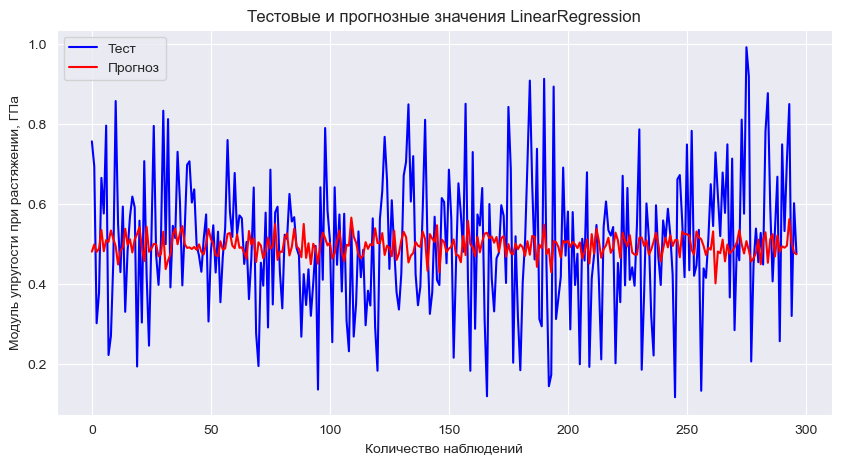

In [117]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения LinearRegression")
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.plot(y1_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [66]:
# создание и обучение модели Линейной регрессии для прочности при растяжении
LR_model2 = LinearRegression()

In [67]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
LR_model2_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_LR_model2 = GridSearchCV(LR_model2, LR_model2_params, n_jobs=-1, cv=10)
GSCV_LR_model2.fit(X2_train, y2_train)
print('Лучшие параметры LinearRegression для предсказания прочности при растяжении: ')
GSCV_LR_model2.best_params_

Лучшие параметры LinearRegression для предсказания прочности при растяжении: 


{'fit_intercept': 'True'}

In [68]:
LR_model2_pro = GSCV_LR_model2.best_estimator_
# предсказанные значения нашей модели
y2_pred = LR_model2_pro.predict(X2_test)

In [69]:
# сравним точность модели с помощью метрик MAE, MSE и RMSE
print('Точность модели Линейной регрессии для предсказания прочности при растяжении составляет: \nMAE  ', 
      mae(y2_test, y2_pred),
     '\nMSE  ', mse(y2_test, y2_pred), 
      '\nRMSE ', sqrt(mse(y2_test, y2_pred)),
      '\nr2   ', r2_score(y2_test, y2_pred))

Точность модели Линейной регрессии для предсказания прочности при растяжении составляет: 
MAE   0.13622058094797934 
MSE   0.028019234151330532 
RMSE  0.16738946846002747 
r2    0.001458601420238237


In [70]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
LR_model2_pro_mae = mae(y2_test, y2_pred)
LR_model2_pro_mse = mse(y2_test, y2_pred)
LR_model2_pro_score = LR_model2_pro.score(X2_test, y2_test)
LR_model2_pro_r2 = r2_score(y2_test, y2_pred)

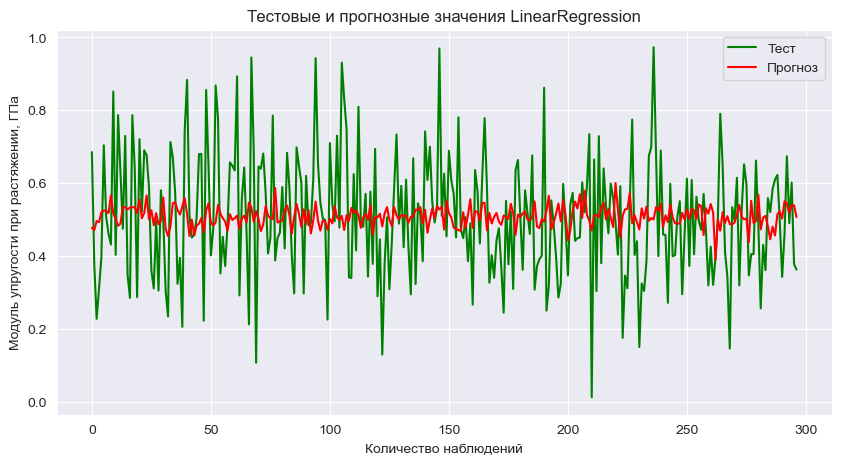

In [73]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения LinearRegression")
plt.plot(y2_test.values, label = "Тест", color = 'green')
plt.plot(y2_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

### 2. Дерево решений

In [75]:
# создание и обучение модели DecisionTreeRegressor для модуля упругости при растяжении
tree1 = DecisionTreeRegressor()

In [77]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
tree1_params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth' : range(1, 20, 2),
    'min_samples_split' : range(10, 100, 5),
    'min_samples_leaf' : range(1, 200, 50),
    'max_features' : ['auto', 'sqrt', 'log2']
    }
GSCV_tree1 = GridSearchCV(tree1, tree1_params, n_jobs=-1, cv=10)
GSCV_tree1.fit(X1_train, y1_train)
print('Лучшие параметры DecisionTreeRegressor для предсказания модуля упругости при растяжении: ')
GSCV_tree1.best_params_

Лучшие параметры DecisionTreeRegressor для предсказания модуля упругости при растяжении: 


{'criterion': 'squared_error',
 'max_depth': 17,
 'max_features': 'auto',
 'min_samples_leaf': 51,
 'min_samples_split': 90,
 'splitter': 'random'}

In [78]:
tree1_upr = GSCV_tree1.best_estimator_
# предсказанные значения нашей модели
y3_pred = tree1_upr.predict(X1_test)

In [79]:
# сравним точность модели с помощью метрик MAE, MSE и RMSE
print('Точность модели DecisionTreeRegressor для предсказания модуля упругости при растяжении составляет: \nMAE - ', 
      mae(y1_test, y3_pred).round(3),
     '\nMSE - ', mse(y1_test, y3_pred).round(3), 
      '\nRMSE -', sqrt(mse(y1_test, y3_pred).round(3)),
      '\nr2   ', r2_score(y1_test, y3_pred))

Точность модели DecisionTreeRegressor для предсказания модуля упругости при растяжении составляет: 
MAE -  0.137 
MSE -  0.029 
RMSE - 0.17029386365926402 
r2    -0.00579783301210135


In [80]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
tree1_upr_mae = mae(y1_test, y3_pred)
tree1_upr_mse = mse(y1_test, y3_pred)
tree1_upr_score = tree1_upr.score(X1_test, y1_test)
tree1_upr_r2 = r2_score(y1_test, y3_pred)

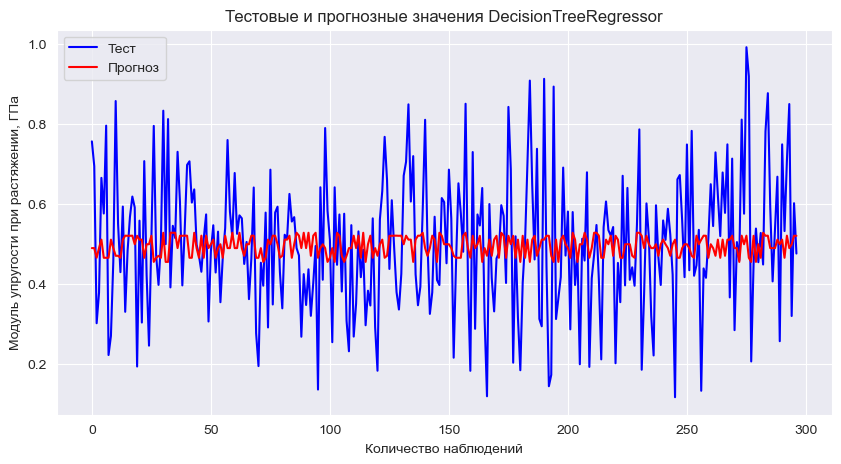

In [128]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.plot(y3_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [82]:
# создание и обучение модели DecisionTreeRegressor для прочности при растяжении
tree2 = DecisionTreeRegressor()

In [83]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
tree2_params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth' : range(1, 20, 2),
    'min_samples_split' : range(10, 100, 5),
    'min_samples_leaf' : range(1, 200, 50),
    'max_features' : ['auto', 'sqrt', 'log2']
}
GSCV_tree2 = GridSearchCV(tree2, tree2_params, n_jobs=-1, cv=10)
GSCV_tree2.fit(X2_train, y2_train)
print('Лучшие параметры DecisionTreeRegressor для предсказания прочности при растяжении:')
GSCV_tree2.best_params_

Лучшие параметры DecisionTreeRegressor для предсказания прочности при растяжении:


{'criterion': 'friedman_mse',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 101,
 'min_samples_split': 80,
 'splitter': 'best'}

In [84]:
tree2_pro = GSCV_tree2.best_estimator_
# предсказанные значения нашей модели
y4_pred = tree2_pro.predict(X2_test)

In [85]:
print('Точность модели DecisionTreeRegressor для предсказания прочности при растяжении составляет: \nMAE - ', 
      mae(y2_test, y4_pred).round(3),
     '\nMSE - ', mse(y2_test, y4_pred).round(3), 
      '\nRMSE -', sqrt(mse(y2_test, y4_pred).round(3)),
      '\nr2   ', r2_score(y2_test, y4_pred))

Точность модели DecisionTreeRegressor для предсказания прочности при растяжении составляет: 
MAE -  0.138 
MSE -  0.028 
RMSE - 0.1673320053068151 
r2    -0.005559716162631512


In [86]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
tree2_pro_mae = mae(y2_test, y4_pred)
tree2_pro_mse = mse(y2_test, y4_pred)
tree2_pro_score = tree2_pro.score(X2_test, y2_test)
tree2_pro_r2 = r2_score(y2_test, y4_pred)

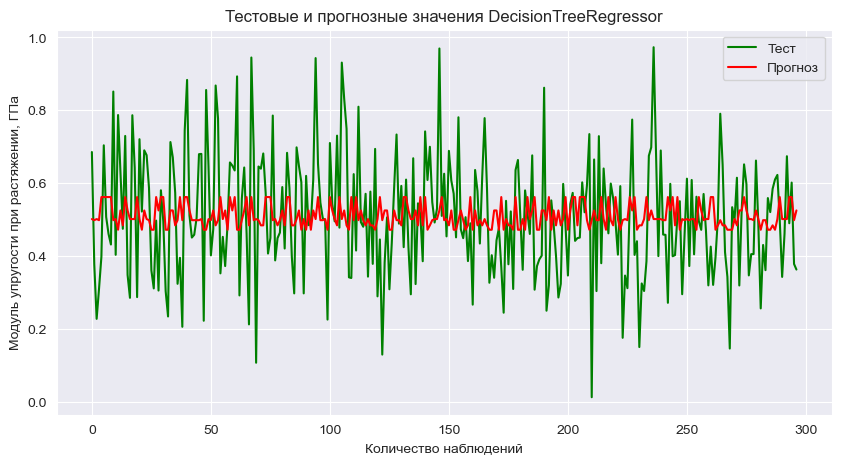

In [129]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(y2_test.values, label = "Тест", color = 'green')
plt.plot(y4_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

### 3. Метод ближайших соседей

In [89]:
# создание и обучение модели KNeighborsRegressor для модуля упругости при растяжении
knr1 = KNeighborsRegressor()

In [90]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
knr1_params = {
        'n_neighbors' : range(1, 100, 2), 
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']    
    }
GSCV_knr1 = GridSearchCV(knr1, knr1_params, n_jobs=-1, cv=10)
GSCV_knr1.fit(X1_train, y1_train)
print('Лучшие параметры KNeighborsRegressor для предсказания модуля упругости при растяжении:')
GSCV_knr1.best_params_

Лучшие параметры KNeighborsRegressor для предсказания модуля упругости при растяжении:


{'algorithm': 'auto', 'n_neighbors': 77, 'weights': 'uniform'}

In [91]:
knr1_upr = GSCV_knr1.best_estimator_
# предсказанные значения нашей модели
y5_pred = knr1_upr.predict(X1_test)

In [92]:
print('Точность модели KNeighborsRegressor для предсказания модуля упругости при растяжении составляет: \nMAE  ', 
      mae(y1_test, y5_pred).round(3),
     '\nMSE  ', mse(y1_test, y5_pred).round(3), 
      '\nRMSE ', sqrt(mse(y1_test, y5_pred).round(3)),
      '\nr2   ', r2_score(y1_test, y5_pred))

Точность модели KNeighborsRegressor для предсказания модуля упругости при растяжении составляет: 
MAE   0.136 
MSE   0.029 
RMSE  0.17029386365926402 
r2    0.004487509611533103


In [93]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
knr1_upr_mae = mae(y1_test, y5_pred)
knr1_upr_mse = mse(y1_test, y5_pred)
knr1_upr_score = knr1_upr.score(X1_test, y1_test)
knr1_upr_r2 = r2_score(y1_test, y5_pred)

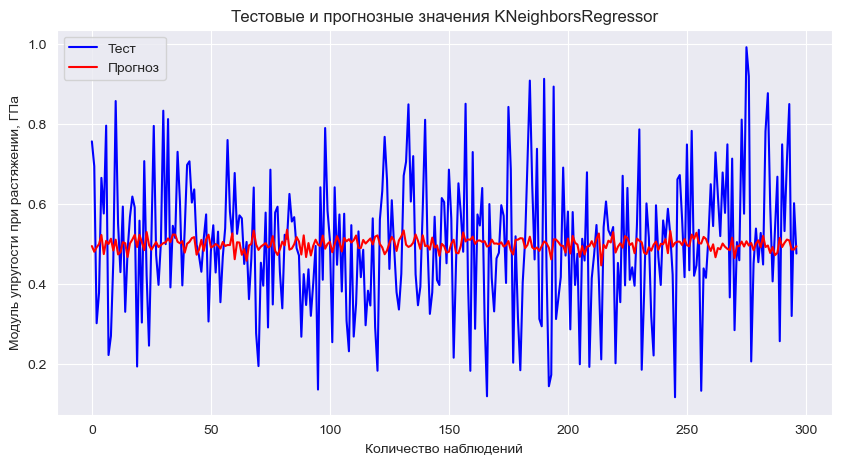

In [130]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения KNeighborsRegressor")
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.plot(y5_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [95]:
# создание и обучение модели KNeighborsRegressor для прочности при растяжении
knr2 = KNeighborsRegressor()

In [96]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
knr2_params = {
        'n_neighbors' : range(1, 100, 2), 
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']    
    }
GSCV_knr2 = GridSearchCV(knr2, knr2_params, n_jobs=-1, cv=10)
GSCV_knr2.fit(X2_train, y2_train)
print('Лучшие параметры KNeighborsRegressor для предсказания прочности при растяжении:')
GSCV_knr2.best_params_

Лучшие параметры KNeighborsRegressor для предсказания прочности при растяжении:


{'algorithm': 'auto', 'n_neighbors': 97, 'weights': 'uniform'}

In [97]:
knr2_pro = GSCV_knr2.best_estimator_
# предсказанные значения нашей модели
y6_pred = knr2_pro.predict(X2_test)

In [98]:
print('Точность модели KNeighborsRegressor для предсказания прочности при растяжении составляет:\nMAE  ', 
      mae(y2_test, y6_pred).round(3),
     '\nMSE  ', mse(y2_test, y6_pred).round(3), 
      '\nRMSE ', sqrt(mse(y2_test, y6_pred).round(3)),
      '\nr2   ', r2_score(y2_test, y6_pred))

Точность модели KNeighborsRegressor для предсказания прочности при растяжении составляет:
MAE   0.134 
MSE   0.028 
RMSE  0.1673320053068151 
r2    0.0072424437070057746


In [99]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
knr2_pro_mae = mae(y2_test, y6_pred)
knr2_pro_mse = mse(y2_test, y6_pred)
knr2_pro_score = knr2_pro.score(X2_test, y2_test)
knr2_pro_r2 = r2_score(y2_test, y6_pred)

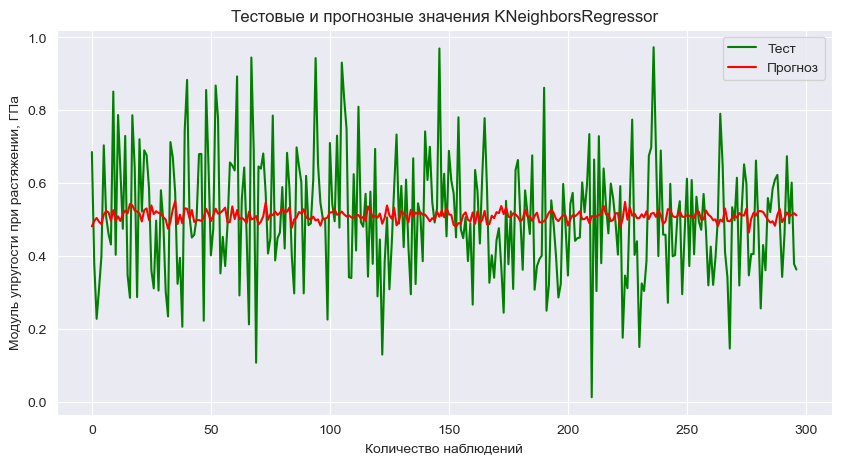

In [131]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения KNeighborsRegressor")
plt.plot(y2_test.values, label = "Тест", color = 'green')
plt.plot(y6_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

### 4. Метод случайного леса - Random Forest Regressor 

In [101]:
# создание и обучение модели Random Forest Regressor для модуля упругости при растяжении
rfr1 = RandomForestRegressor()

In [102]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
rfr1_params = {
    'n_estimators' : range(1, 500, 10),
    'criterion' : ['squared_error','absolute_error', 'poisson'],
    'max_depth' : range(1, 8),
    'min_samples_split' : range(10, 50, 5),
    'min_samples_leaf' : range(2, 9),
    'bootstrap' : ['True', 'False'],
    'oob_score': ['True', 'False'],
    'warm_start': ['True', 'False']
    }
GSCV_rfr1 = RandomizedSearchCV(rfr1, rfr1_params, n_jobs=-1, cv=10)
GSCV_rfr1.fit(X1_train, np.ravel(y1_train))
print('Лучшие параметры RandomForestRegressor для предсказания модуля упругости при растяжении: ')
GSCV_rfr1.best_params_

Лучшие параметры RandomForestRegressor для предсказания модуля упругости при растяжении: 


{'warm_start': 'False',
 'oob_score': 'False',
 'n_estimators': 451,
 'min_samples_split': 30,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'criterion': 'absolute_error',
 'bootstrap': 'False'}

In [103]:
rfr1_upr = GSCV_rfr1.best_estimator_
# предсказанные значения нашей модели
y7_pred = rfr1_upr.predict(X1_test)

In [104]:
print('Точность модели RandomForestRegressor для предсказания модуля упругости при растяжении составляет:  \nMAE  ', 
      mae(y1_test, y7_pred).round(3),
     '\nMSE  ', mse(y1_test, y7_pred).round(3), 
      '\nRMSE ', sqrt(mse(y1_test, y7_pred).round(3)),
      '\nr2  ', r2_score(y1_test, y7_pred))

Точность модели RandomForestRegressor для предсказания модуля упругости при растяжении составляет:  
MAE   0.137 
MSE   0.03 
RMSE  0.17320508075688773 
r2   -0.013782187128413392


In [105]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
rfr1_upr_mae = mae(y1_test, y7_pred)
rfr1_upr_mse = mse(y1_test, y7_pred)
rfr1_upr_score = rfr1_upr.score(X1_test, y1_test)
rfr1_upr_r2 = r2_score(y1_test, y7_pred)

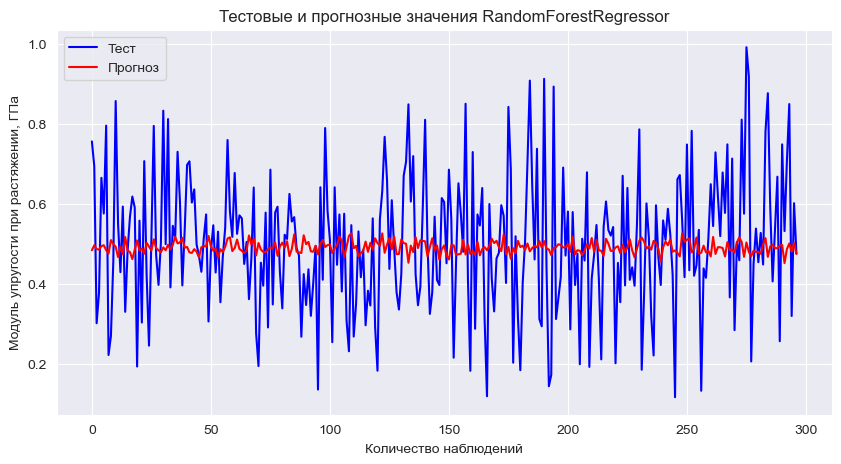

In [132]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения RandomForestRegressor")
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.plot(y7_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [107]:
# создание и обучение модели RandomForestRegressor для прочности при растяжении
rfr2 = RandomForestRegressor()

In [108]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
rfr2_params = {
    'n_estimators' : range(1, 4),
    'criterion' : ['squared_error','absolute_error', 'poisson'],
    'max_depth' : range(1, 4),
    'min_samples_split' : range(1, 4),
    'min_samples_leaf' : range(1, 4),
    'bootstrap' : ['True', 'False'],
    'oob_score': ['True', 'False'],
    'warm_start': ['True', 'False']
    }
GSCV_rfr2 = RandomizedSearchCV(rfr2, rfr2_params, n_jobs=-1, cv=10)
GSCV_rfr2.fit(X2_train, y2_train)
print('Лучшие параметры RandomForestRegressor для предсказания прочности при растяжении: ')
GSCV_rfr2.best_params_

Лучшие параметры RandomForestRegressor для предсказания прочности при растяжении: 


{'warm_start': 'True',
 'oob_score': 'False',
 'n_estimators': 3,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 1,
 'criterion': 'squared_error',
 'bootstrap': 'False'}

In [109]:
rfr2_pro = GSCV_rfr2.best_estimator_
# предсказанные значения нашей модели
y8_pred = rfr2_pro.predict(X2_test)

In [110]:
print('Точность модели RandomForestRegressor для предсказания прочности при растяжении составляет: \nMAE  ', 
      mae(y2_test, y8_pred).round(3),
     '\nMSE  ', mse(y2_test, y8_pred).round(3), 
      '\nRMSE ', sqrt(mse(y2_test, y8_pred).round(3)),
      '\nr2  ', r2_score(y2_test, y8_pred))

Точность модели RandomForestRegressor для предсказания прочности при растяжении составляет: 
MAE   0.134 
MSE   0.028 
RMSE  0.1673320053068151 
r2   0.005193704024973433


In [111]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
rfr2_pro_mae = mae(y2_test, y8_pred).round(3)
rfr2_pro_mse = mse(y2_test, y8_pred).round(3)
rfr2_pro_score = rfr2_pro.score(X2_test, y2_test)
rfr2_pro_r2 = r2_score(y2_test, y8_pred)

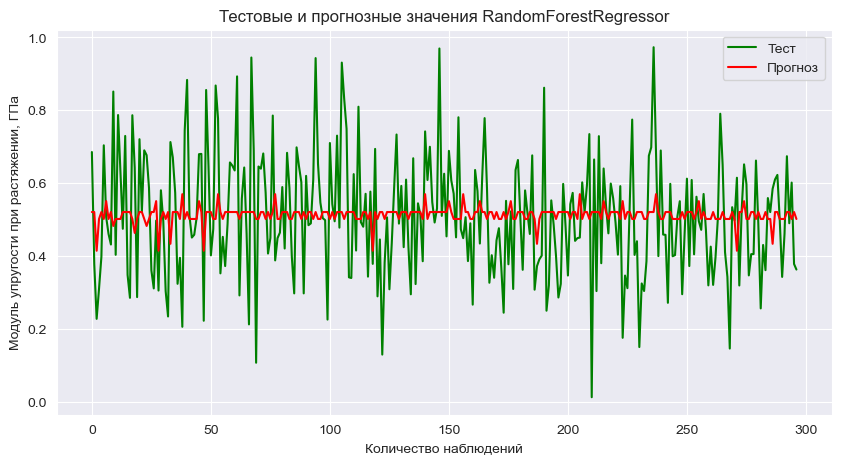

In [133]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения RandomForestRegressor")
plt.plot(y2_test.values, label = "Тест", color = 'green')
plt.plot(y8_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

### 5. Метод градиентного бустинга - Gradient Boosting Regressor

In [114]:
# создание и обучение модели Gradient Boosting Regressor для модуля упругости при растяжении
gbr1 = GradientBoostingRegressor()

In [115]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
gbr1_params = {
    'n_estimators' : range(1, 10),
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'max_depth' : range(1, 5),
    'min_samples_split' : range(1, 10),
    'min_samples_leaf' : range(1, 10, 2),
    'max_features' : range(1, 10)
    }
GSCV_gbr1 = RandomizedSearchCV(gbr1, gbr1_params, n_jobs=-1, cv=10)
GSCV_gbr1.fit(X1_train, y1_train)
print('Лучшие параметры Gradient Boosting Regressor для предсказания модуля упругости при растяжении:')
GSCV_gbr1.best_params_

Лучшие параметры Gradient Boosting Regressor для предсказания модуля упругости при растяжении:


{'n_estimators': 7,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 2,
 'max_depth': 1,
 'loss': 'absolute_error',
 'criterion': 'mse'}

In [118]:
gbr1_upr = GSCV_gbr1.best_estimator_
# предсказанные значения нашей модели
y9_pred = gbr1_upr.predict(X1_test)

In [119]:
print('Точность модели Gradient Boosting Regressor для предсказания модуля упругости при растяжении составляет: \nMAE  ', 
      mae(y1_test, y9_pred).round(3),
     '\nMSE  ', mse(y1_test, y9_pred).round(3), 
      '\nRMSE ', sqrt(mse(y1_test, y9_pred).round(3)),
      '\nr2  ', r2_score(y1_test, y9_pred))

Точность модели Gradient Boosting Regressor для предсказания модуля упругости при растяжении составляет: 
MAE   0.136 
MSE   0.029 
RMSE  0.17029386365926402 
r2   -0.005486966182762787


In [120]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
gbr1_upr_mae = mae(y1_test, y9_pred)
gbr1_upr_mse = mse(y1_test, y9_pred)
gbr1_upr_score = gbr1_upr.score(X1_test, y1_test)
gbr1_upr_r2 = r2_score(y1_test, y9_pred)

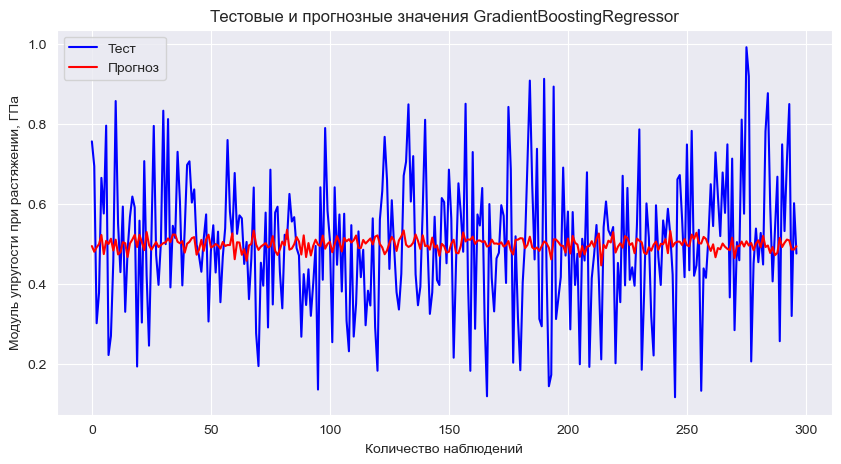

In [134]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения GradientBoostingRegressor")
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.plot(y5_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [122]:
# создание и обучение модели Gradient Boosting Regressor для прочности при растяжении
gbr2 = GradientBoostingRegressor()

In [123]:
#поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
gbr2_params = {
    'n_estimators' : range(1, 10),
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'max_depth' : range(1, 5),
    'min_samples_split' : range(1, 10),
    'min_samples_leaf' : range(1, 10, 2),
    'max_features' : range(1, 10)
    }
GSCV_gbr2 = RandomizedSearchCV(gbr2, gbr2_params, n_jobs=-1, cv=10)
GSCV_gbr2.fit(X2_train, y2_train)
print('Лучшие параметры Gradient Boosting Regressor для предсказания прочности при растяжении:')
GSCV_gbr2.best_params_

Лучшие параметры Gradient Boosting Regressor для предсказания прочности при растяжении:


{'n_estimators': 6,
 'min_samples_split': 3,
 'min_samples_leaf': 9,
 'max_features': 1,
 'max_depth': 2,
 'loss': 'squared_error',
 'criterion': 'friedman_mse'}

In [124]:
gbr2_pro = GSCV_gbr2.best_estimator_
# предсказанные значения нашей модели
y10_pred = gbr2_pro.predict(X2_test)

In [125]:
print('Точность модели Gradient Boosting Regressor для предсказания прочности при растяжении составляет: \nMAE  ', 
      mae(y2_test, y10_pred).round(3),
     '\nMSE  ', mse(y2_test, y10_pred).round(3), 
      '\nRMSE ', sqrt(mse(y2_test, y10_pred).round(3)),
      '\nr2  ', r2_score(y2_test, y10_pred))

Точность модели Gradient Boosting Regressor для предсказания прочности при растяжении составляет: 
MAE   0.135 
MSE   0.028 
RMSE  0.1673320053068151 
r2   -0.00019076706941989485


In [126]:
# выведем значение метрик для итоговой таблицы, в которой будем сравнивать качество разных моделей
gbr2_pro_mae = mae(y2_test, y10_pred)
gbr2_pro_mse = mse(y2_test, y10_pred)
gbr2_pro_score = gbr2_pro.score(X2_test, y2_test)
gbr2_pro_r2 = r2_score(y2_test, y10_pred)

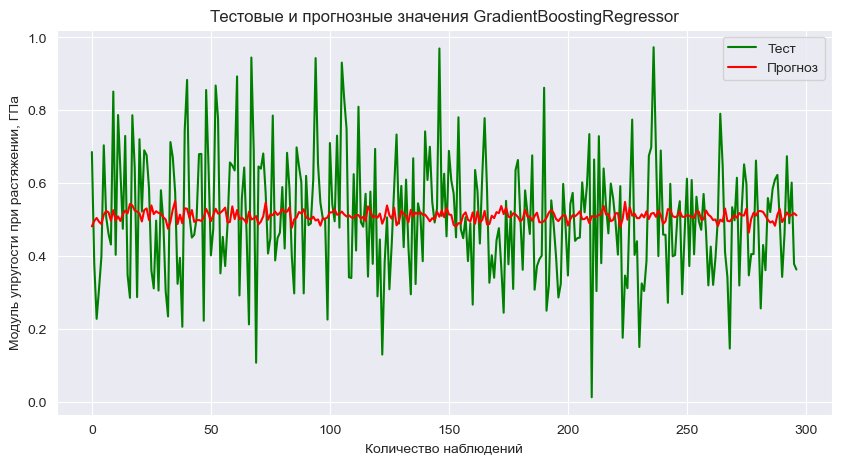

In [135]:
plt.figure(figsize=(10, 5))
plt.title("Тестовые и прогнозные значения GradientBoostingRegressor")
plt.plot(y2_test.values, label = "Тест", color = 'green')
plt.plot(y6_pred, label = "Прогноз", color = "red")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

### Сравнение качества моделей

In [136]:
#сравним наши модели по метрикам
Score_df_upr = {'Модель для модуля упругости при растяжении': ['LinearRegression', 'DecisionTree', 'KNeighborsRegressor', 
                     'RandomForestRegressor', 'GradientBoostingRegressor'], 
                'MAE': [LR_model1_upr_mae, tree1_upr_mae, knr1_upr_mae, rfr1_upr_mae, gbr1_upr_mae],
               'MSE': [LR_model1_upr_mse, tree1_upr_mse, knr1_upr_mse, rfr1_upr_mse, gbr1_upr_mse],
               'Score': [LR_model1_upr_score, tree1_upr_score, knr1_upr_score, rfr1_upr_score, gbr1_upr_score],
               'r2': [LR_model1_upr_r2, tree1_upr_r2, knr1_upr_r2, rfr1_upr_r2, gbr1_upr_r2]} 

Score_df_upr = pd.DataFrame(Score_df_upr)
Score_df_upr.sort_values(by = 'Score', ascending = False)

Модель для модуля упругости при растяжении       MAE       MSE     Score  \
2                        KNeighborsRegressor  0.136126  0.029122  0.004488   
4                  GradientBoostingRegressor  0.136359  0.029413 -0.005487   
1                               DecisionTree  0.136798  0.029423 -0.005798   
0                           LinearRegression  0.136385  0.029613 -0.012293   
3                      RandomForestRegressor  0.137106  0.029656 -0.013782   

         r2  
2  0.004488  
4 -0.005487  
1 -0.005798  
0 -0.012293  
3 -0.013782

In [137]:
#сравним наши модели по метрикам
Score_df_pro = {'Модель для прочности при растяжении': ['LinearRegression', 'DecisionTree', 'KNeighborsRegressor', 
                     'RandomForestRegressor', 'GradientBoostingRegressor'],
                 'MAE': [LR_model2_pro_mae, tree2_pro_mae, knr2_pro_mae, rfr2_pro_mae, gbr2_pro_mae],
               'MSE': [LR_model2_pro_mse, tree2_pro_mse, knr2_pro_mse, rfr2_pro_mse, gbr2_pro_mse],
                'Score': [LR_model2_pro_score, tree2_pro_score, knr2_pro_score, rfr2_pro_score, gbr2_pro_score],
               'r2': [LR_model2_pro_r2, tree2_pro_r2, knr2_pro_r2, rfr2_pro_r2, gbr2_pro_r2]} 

Score_df_pro = pd.DataFrame(Score_df_pro)
Score_df_pro.sort_values(by = 'Score', ascending = False)

Модель для прочности при растяжении       MAE       MSE     Score        r2
2                 KNeighborsRegressor  0.134416  0.027857  0.007242  0.007242
3               RandomForestRegressor  0.134000  0.028000  0.005194  0.005194
0                    LinearRegression  0.136221  0.028019  0.001459  0.001459
4           GradientBoostingRegressor  0.135191  0.028066 -0.000191 -0.000191
1                        DecisionTree  0.137633  0.028216 -0.005560 -0.005560

### Нейронная сеть для предсказания соотношения матрица-наполнитель

In [138]:
# загружаем необходимые библиотеки
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [139]:
#определяем X и y
y_ns = np.array(df7['Соотношение матрица-наполнитель'])
X_ns = np.array(df7.drop(['Соотношение матрица-наполнитель'], axis = 1))


#train_test_split
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, 
                                                                test_size=0.3, 
                                                                random_state = 1)


### 1 вариант

In [140]:
# нормализуем данные для подачи в нейросеть
normalizer = tf.keras.layers.Normalization(axis=-1)
X_train_ns_norm = normalizer.adapt(np.array(X_train_ns))

In [141]:
# воспользуемся классом Sequential библиотеки Keras, который укажет, 
# что мы задаём последовательно связанные между собой слои
model_mn = Sequential(X_train_ns_norm)
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(128, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(64, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(32, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(16, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('sigmoid'))

In [142]:
# Настроек будет три:
# 1) тип функции потерь (loss function) определяет, как мы будем считать отклонение прогнозного значения от истинного
# 2) способ или алгоритм оптимизации этой функции (optimizer) поможет снизить потерю или ошибку 
# и подобрать правильные веса в процессе back propagation
# 3) метрика (metric) покажет, насколько точна наша модель
model_mn.compile(
    optimizer='Adam',
    loss= 'mse', metrics = ['mae'])

In [143]:
history = model_mn.fit( X_train_ns, 
                        y_train_ns,
                        epochs = 100, 
                        verbose = 1, 
                        validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 3s 37ms/step - loss: 6.5081 - mae: 2.3686 - val_loss: 9.7083 - val_mae: 2.9914
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 6.2853 - mae: 2.3248 - val_loss: 9.7065 - val_mae: 2.9911
Epoch 3/100
18/18 [==============================] - 0s 12ms/step - loss: 6.0675 - mae: 2.2815 - val_loss: 9.6900 - val_mae: 2.9883
Epoch 4/100
18/18 [==============================] - 0s 12ms/step - loss: 5.8385 - mae: 2.2312 - val_loss: 9.6232 - val_mae: 2.9772
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 5.6896 - mae: 2.1918 - val_loss: 9.2660 - val_mae: 2.9170
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 5.6026 - mae: 2.1750 - val_loss: 7.9386 - val_mae: 2.6804
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 5.4754 - mae: 2.1471 - val_loss: 6.3040 - val_mae: 2.3519
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 5.

In [144]:
model_mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [145]:
# ошибка на тренировочных данных
model_mn.evaluate(X_train_ns, y_train_ns)

22/22 [==============================] - 0s 4ms/step - loss: 4.4915 - mae: 1.9232


[4.4914937019348145, 1.923170566558838]

In [146]:
# ошибка на тестовых данных 
model_mn.evaluate(X_test_ns, y_test_ns)

10/10 [==============================] - 0s 4ms/step - loss: 4.8217 - mae: 1.9990


[4.821669101715088, 1.999019742012024]

In [147]:
# предскажем несколько значений
y_pred = model_mn.predict(X_test_ns[:10])
y_pred

1/1 [==============================] - 0s 305ms/step


array([[0.99925697],
       [0.9997535 ],
       [0.9988253 ],
       [0.99906665],
       [0.9988732 ],
       [0.9988669 ],
       [0.99861914],
       [0.9988692 ],
       [0.9984796 ],
       [0.99871814]], dtype=float32)

In [148]:
for i in range(len(y_pred)):
  print("Сеть предсказала: ", y_pred[i], ",  верный ответ: ", y_test_ns[i], ", разница: ", y_pred[i] - y_test_ns[i])

Сеть предсказала:  [0.99925697] ,  верный ответ:  3.55290174530877 , разница:  [-2.5536447]
Сеть предсказала:  [0.9997535] ,  верный ответ:  4.48753784478679 , разница:  [-3.4877844]
Сеть предсказала:  [0.9988253] ,  верный ответ:  2.16206654053006 , разница:  [-1.1632411]
Сеть предсказала:  [0.99906665] ,  верный ответ:  2.34085144536387 , разница:  [-1.341785]
Сеть предсказала:  [0.9988732] ,  верный ответ:  3.20092356596097 , разница:  [-2.2020504]
Сеть предсказала:  [0.9988669] ,  верный ответ:  2.31039410911609 , разница:  [-1.3115271]
Сеть предсказала:  [0.99861914] ,  верный ответ:  3.91676005666979 , разница:  [-2.918141]
Сеть предсказала:  [0.9988692] ,  верный ответ:  1.80704590365679 , разница:  [-0.80817676]
Сеть предсказала:  [0.9984796] ,  верный ответ:  4.90268576402151 , разница:  [-3.904206]
Сеть предсказала:  [0.99871814] ,  верный ответ:  2.75615321756256 , разница:  [-1.757435]


In [151]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([4,8])
    plt.title('График потерь модели', size=12)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

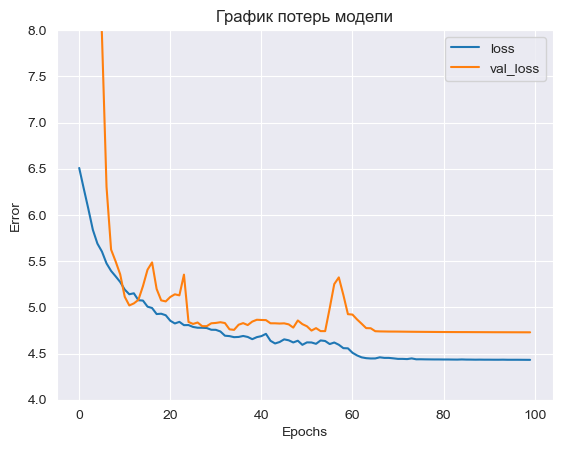

In [152]:
# визуализация ошибок нейросети
plot_loss(history)

### 2 вариант

In [153]:
# увеличим количество слоев, нейронов и уменьшим количество эпох
model_mn = Sequential(X_train_ns_norm)

model_mn.add(Dense(256))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(256, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(128, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(64, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(32, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(16, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('sigmoid'))

In [154]:
model_mn.compile(
    optimizer='Adam',
    loss='mean_absolute_error', metrics = ['mae'])

In [155]:
history = model_mn.fit( X_train_ns, 
                        y_train_ns,
                        epochs = 35, 
                        verbose = 1, 
                        validation_split = 0.2)

Epoch 1/35
18/18 [==============================] - 4s 39ms/step - loss: 2.3968 - mae: 2.3968 - val_loss: 2.0769 - val_mae: 2.0769
Epoch 2/35
18/18 [==============================] - 0s 16ms/step - loss: 2.3730 - mae: 2.3730 - val_loss: 2.1116 - val_mae: 2.1116
Epoch 3/35
18/18 [==============================] - 0s 14ms/step - loss: 2.3452 - mae: 2.3452 - val_loss: 2.2099 - val_mae: 2.2099
Epoch 4/35
18/18 [==============================] - 0s 16ms/step - loss: 2.3082 - mae: 2.3082 - val_loss: 2.2081 - val_mae: 2.2081
Epoch 5/35
18/18 [==============================] - 0s 16ms/step - loss: 2.2750 - mae: 2.2750 - val_loss: 2.1938 - val_mae: 2.1938
Epoch 6/35
18/18 [==============================] - 0s 16ms/step - loss: 2.2414 - mae: 2.2414 - val_loss: 2.2089 - val_mae: 2.2089
Epoch 7/35
18/18 [==============================] - 0s 15ms/step - loss: 2.2066 - mae: 2.2066 - val_loss: 2.1820 - val_mae: 2.1820
Epoch 8/35
18/18 [==============================] - 0s 16ms/step - loss: 2.1761 - m

In [156]:
model_mn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               3328      
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [157]:
# ошибка на тренировочных данных
model_mn.evaluate(X_train_ns, y_train_ns)

22/22 [==============================] - 0s 5ms/step - loss: 1.9314 - mae: 1.9314


[1.931449294090271, 1.931449294090271]

In [158]:
# ошибка на тестовых данных 
model_mn.evaluate(X_test_ns, y_test_ns)

10/10 [==============================] - 0s 4ms/step - loss: 2.0069 - mae: 2.0069


[2.0069451332092285, 2.0069451332092285]

In [159]:
y_pred = model_mn.predict(X_test_ns[:10])
y_pred

1/1 [==============================] - 0s 236ms/step


array([[0.99837285],
       [0.98848283],
       [0.992074  ],
       [0.992211  ],
       [0.9949249 ],
       [0.9995266 ],
       [0.9907931 ],
       [0.9947628 ],
       [0.9903228 ],
       [0.98026013]], dtype=float32)

In [160]:
for i in range(len(y_pred)):
  print("Сеть предсказала: ", y_pred[i], ",  верный ответ: ", y_test_ns[i], ", разница: ", y_pred[i] - y_test_ns[i])

Сеть предсказала:  [0.99837285] ,  верный ответ:  3.55290174530877 , разница:  [-2.554529]
Сеть предсказала:  [0.98848283] ,  верный ответ:  4.48753784478679 , разница:  [-3.499055]
Сеть предсказала:  [0.992074] ,  верный ответ:  2.16206654053006 , разница:  [-1.1699924]
Сеть предсказала:  [0.992211] ,  верный ответ:  2.34085144536387 , разница:  [-1.3486406]
Сеть предсказала:  [0.9949249] ,  верный ответ:  3.20092356596097 , разница:  [-2.205999]
Сеть предсказала:  [0.9995266] ,  верный ответ:  2.31039410911609 , разница:  [-1.3108674]
Сеть предсказала:  [0.9907931] ,  верный ответ:  3.91676005666979 , разница:  [-2.9259667]
Сеть предсказала:  [0.9947628] ,  верный ответ:  1.80704590365679 , разница:  [-0.81228316]
Сеть предсказала:  [0.9903228] ,  верный ответ:  4.90268576402151 , разница:  [-3.9123628]
Сеть предсказала:  [0.98026013] ,  верный ответ:  2.75615321756256 , разница:  [-1.775893]


In [163]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([1.5,3])
    plt.title('График потерь модели', size=12)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

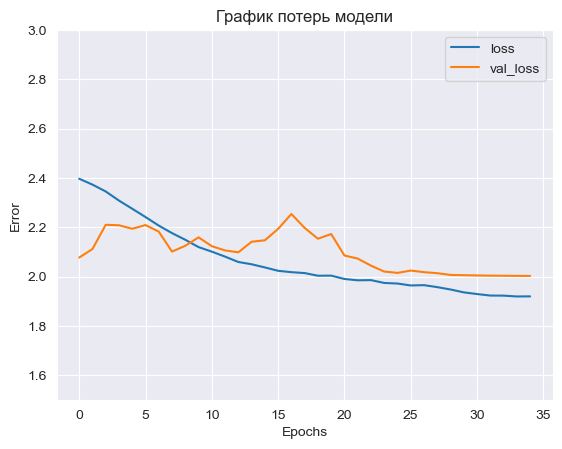

In [164]:
plot_loss(history)

### 3 вариант

In [165]:
# уменьшим количество слоев, нейронов и эпох. Изменим оптимайзер
model_mn = Sequential(X_train_ns_norm)

model_mn.add(Dense(64, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(32, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dropout(0.18))
model_mn.add(Dense(16, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('sigmoid'))

In [166]:
model_mn.compile(
    optimizer='rmsprop',
    loss='mse', metrics = ['mae'])

In [167]:
history = model_mn.fit( X_train_ns, 
                        y_train_ns,
                        epochs = 20, 
                        verbose = 1, 
                        validation_split = 0.2)

Epoch 1/20
18/18 [==============================] - 2s 28ms/step - loss: 6.5932 - mae: 2.3900 - val_loss: 8.2311 - val_mae: 2.7271
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 6.4457 - mae: 2.3614 - val_loss: 7.5613 - val_mae: 2.6019
Epoch 3/20
18/18 [==============================] - 0s 11ms/step - loss: 6.3024 - mae: 2.3329 - val_loss: 7.2079 - val_mae: 2.5360
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 6.1732 - mae: 2.3099 - val_loss: 7.0678 - val_mae: 2.5092
Epoch 5/20
18/18 [==============================] - 0s 12ms/step - loss: 6.0442 - mae: 2.2830 - val_loss: 7.2447 - val_mae: 2.5450
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 5.9152 - mae: 2.2522 - val_loss: 6.4354 - val_mae: 2.3799
Epoch 7/20
18/18 [==============================] - 0s 9ms/step - loss: 5.8045 - mae: 2.2286 - val_loss: 6.5155 - val_mae: 2.4002
Epoch 8/20
18/18 [==============================] - 0s 11ms/step - loss: 5.6669 - mae

In [168]:
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                832       
                                                                 
 batch_normalization_12 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_13 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32)               

In [169]:
# ошибка на тренировочных данных
model_mn.evaluate(X_train_ns, y_train_ns)

22/22 [==============================] - 0s 4ms/step - loss: 4.6077 - mae: 1.9535


[4.607658863067627, 1.9534910917282104]

In [170]:
# ошибка на тестовых данных 
model_mn.evaluate(X_test_ns, y_test_ns)

10/10 [==============================] - 0s 5ms/step - loss: 4.9417 - mae: 2.0285


[4.941669940948486, 2.0284719467163086]

In [171]:
y_pred = model_mn.predict(X_test_ns[:10])
y_pred

1/1 [==============================] - 0s 143ms/step


array([[0.9612267 ],
       [0.97658664],
       [0.9731664 ],
       [0.97002107],
       [0.96681654],
       [0.9550332 ],
       [0.9840956 ],
       [0.9866631 ],
       [0.9572945 ],
       [0.974797  ]], dtype=float32)

In [172]:
for i in range(len(y_pred)):
  print("Сеть предсказала: ", y_pred[i], ",  верный ответ: ", y_test_ns[i], ", разница: ", y_pred[i] - y_test_ns[i])

Сеть предсказала:  [0.9612267] ,  верный ответ:  3.55290174530877 , разница:  [-2.591675]
Сеть предсказала:  [0.97658664] ,  верный ответ:  4.48753784478679 , разница:  [-3.5109513]
Сеть предсказала:  [0.9731664] ,  верный ответ:  2.16206654053006 , разница:  [-1.1889]
Сеть предсказала:  [0.97002107] ,  верный ответ:  2.34085144536387 , разница:  [-1.3708305]
Сеть предсказала:  [0.96681654] ,  верный ответ:  3.20092356596097 , разница:  [-2.234107]
Сеть предсказала:  [0.9550332] ,  верный ответ:  2.31039410911609 , разница:  [-1.3553609]
Сеть предсказала:  [0.9840956] ,  верный ответ:  3.91676005666979 , разница:  [-2.9326644]
Сеть предсказала:  [0.9866631] ,  верный ответ:  1.80704590365679 , разница:  [-0.82038283]
Сеть предсказала:  [0.9572945] ,  верный ответ:  4.90268576402151 , разница:  [-3.9453912]
Сеть предсказала:  [0.974797] ,  верный ответ:  2.75615321756256 , разница:  [-1.7813561]


In [173]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0,10])
    plt.title('График потерь модели', size=12)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

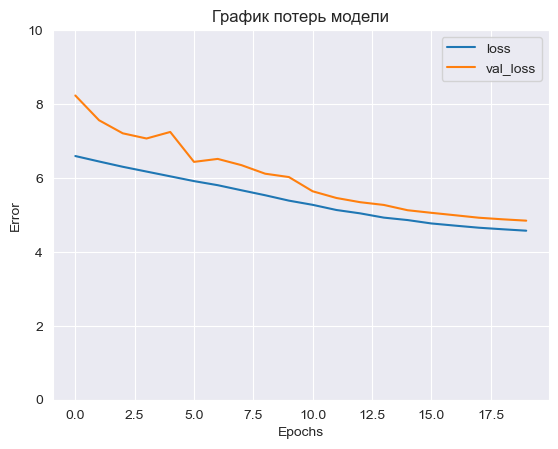

In [174]:
plot_loss(history)

### 4 вариант

In [175]:
# подадим в нейросеть данные после нормализации после MinMaxScaler
#определяем X y
y_ns = np.array(df_norm_df['Соотношение матрица-наполнитель'])
X_ns = np.array(df_norm_df.drop(['Соотношение матрица-наполнитель'], axis = 1))


#train_test_split
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, 
                                                                test_size=0.3, 
                                                                random_state = 1)


In [176]:
#архитектура модели
model_ns = Sequential()
model_ns.add(Dense(128, input_shape = (X_train_ns.shape[1],), activation = 'relu'))
model_ns.add(BatchNormalization())
model_ns.add(Dense(128, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(64, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(32, activation='relu'))
model_ns.add(Dense(16, activation='relu'))
model_ns.add(BatchNormalization())
model_ns.add(Dense(1, activation = 'sigmoid'))

In [177]:
#компиляция
model_ns.compile(
    optimizer='Adam',
    loss='mean_absolute_error', metrics = ['mae'])

In [178]:
history = model_ns.fit( X_train_ns, 
                        y_train_ns,
                        epochs = 100, 
                        verbose = 1, 
                        validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 1s 21ms/step - loss: 0.1926 - mae: 0.1926 - val_loss: 0.1320 - val_mae: 0.1320
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1643 - mae: 0.1643 - val_loss: 0.1320 - val_mae: 0.1320
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1621 - mae: 0.1621 - val_loss: 0.1324 - val_mae: 0.1324
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1505 - mae: 0.1505 - val_loss: 0.1320 - val_mae: 0.1320
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1474 - mae: 0.1474 - val_loss: 0.1324 - val_mae: 0.1324
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1411 - mae: 0.1411 - val_loss: 0.1324 - val_mae: 0.1324
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1433 - mae: 0.1433 - val_loss: 0.1324 - val_mae: 0.1324
Epoch 8/100
18/18 [==============================] - 0s 11ms/step - loss: 0.14

Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1085 - mae: 0.1085 - val_loss: 0.1458 - val_mae: 0.1458
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1082 - mae: 0.1082 - val_loss: 0.1505 - val_mae: 0.1505
Epoch 65/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1077 - mae: 0.1077 - val_loss: 0.1554 - val_mae: 0.1554
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1080 - mae: 0.1080 - val_loss: 0.1492 - val_mae: 0.1492
Epoch 67/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1020 - mae: 0.1020 - val_loss: 0.1512 - val_mae: 0.1512
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1105 - mae: 0.1105 - val_loss: 0.1468 - val_mae: 0.1468
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 0.1084 - mae: 0.1084 - val_loss: 0.1568 - val_mae: 0.1568
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - los

In [179]:
model_ns.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_15 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                      

In [180]:
# ошибка на тренировочных данных
model_ns.evaluate(X_train_ns, y_train_ns)

22/22 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.0889


[0.0888914242386818, 0.0888914242386818]

In [181]:
# ошибка на тестовых данных
model_ns.evaluate(X_test_ns, y_test_ns)

10/10 [==============================] - 0s 4ms/step - loss: 0.1586 - mae: 0.1586


[0.15858368575572968, 0.15858368575572968]

In [182]:
y_pred = model_ns.predict(X_test_ns[:10])
y_pred

1/1 [==============================] - 0s 159ms/step


array([[0.49966943],
       [0.5361674 ],
       [0.50632685],
       [0.48379868],
       [0.52047455],
       [0.37892634],
       [0.5203797 ],
       [0.55046856],
       [0.47011083],
       [0.47657025]], dtype=float32)

In [183]:
for i in range(len(y_pred)):
  print("Сеть предсказала: ", y_pred[i], ",  верный ответ: ", y_test_ns[i], ", разница: ", y_pred[i] - y_test_ns[i])

Сеть предсказала:  [0.49966943] ,  верный ответ:  0.6080916956913652 , разница:  [-0.10842228]
Сеть предсказала:  [0.5361674] ,  верный ответ:  0.7877485962974875 , разница:  [-0.2515812]
Сеть предсказала:  [0.50632685] ,  верный ответ:  0.3407436419579659 , разница:  [0.16558322]
Сеть предсказала:  [0.48379868] ,  верный ответ:  0.3751098962632954 , разница:  [0.10868877]
Сеть предсказала:  [0.52047455] ,  верный ответ:  0.5404340171382603 , разница:  [-0.01995945]
Сеть предсказала:  [0.37892634] ,  верный ответ:  0.36925534962845996 , разница:  [0.00967097]
Сеть предсказала:  [0.5203797] ,  верный ответ:  0.6780329878321312 , разница:  [-0.15765327]
Сеть предсказала:  [0.55046856] ,  верный ответ:  0.272501138477216 , разница:  [0.27796742]
Сеть предсказала:  [0.47011083] ,  верный ответ:  0.8675488399478715 , разница:  [-0.397438]
Сеть предсказала:  [0.47657025] ,  верный ответ:  0.4549397137196465 , разница:  [0.02163053]


In [184]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0,0.3])
    plt.title('График потерь модели', size=12)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

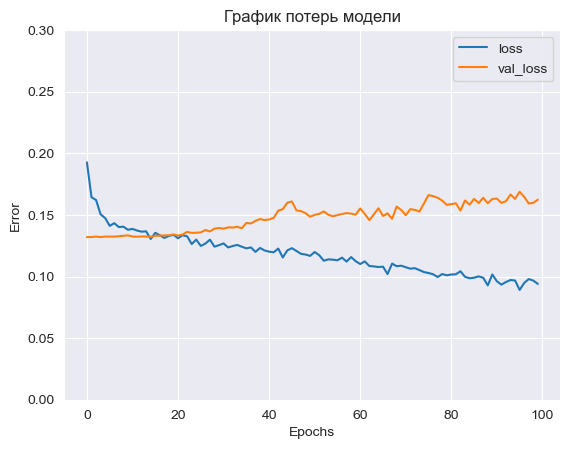

In [185]:
plot_loss(history)

### 5 вариант

In [186]:
# увеличим количество слоев и нейронов и уменьшим количество эпох
#архитектура модели
model_ns = Sequential()
model_ns.add(Dense(256, input_shape = (X_train_ns.shape[1],), activation = 'relu'))
model_ns.add(BatchNormalization())
model_ns.add(Dense(128, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(128, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(64, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(64, activation='relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(32, activation='relu'))
model_ns.add(Dense(16, activation='relu'))
model_ns.add(BatchNormalization())
model_ns.add(Dense(1, activation = 'sigmoid'))

In [187]:
#компиляция
model_ns.compile(
    optimizer='Adam',
    loss='mean_absolute_error', metrics = ['mae'])

In [188]:
history = model_ns.fit( X_train_ns, 
                        y_train_ns,
                        epochs = 30, 
                        verbose = 1, 
                        validation_split = 0.2)

Epoch 1/30
18/18 [==============================] - 1s 23ms/step - loss: 0.1965 - mae: 0.1965 - val_loss: 0.1335 - val_mae: 0.1335
Epoch 2/30
18/18 [==============================] - 0s 11ms/step - loss: 0.1733 - mae: 0.1733 - val_loss: 0.1330 - val_mae: 0.1330
Epoch 3/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1601 - mae: 0.1601 - val_loss: 0.1323 - val_mae: 0.1323
Epoch 4/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1537 - mae: 0.1537 - val_loss: 0.1323 - val_mae: 0.1323
Epoch 5/30
18/18 [==============================] - 0s 11ms/step - loss: 0.1478 - mae: 0.1478 - val_loss: 0.1321 - val_mae: 0.1321
Epoch 6/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1472 - mae: 0.1472 - val_loss: 0.1321 - val_mae: 0.1321
Epoch 7/30
18/18 [==============================] - 0s 14ms/step - loss: 0.1417 - mae: 0.1417 - val_loss: 0.1320 - val_mae: 0.1320
Epoch 8/30
18/18 [==============================] - 0s 11ms/step - loss: 0.1469 - m

In [189]:
model_ns.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               3328      
                                                                 
 batch_normalization_17 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                      

In [190]:
# ошибка на тренировочных данных
model_ns.evaluate(X_train_ns, y_train_ns)

22/22 [==============================] - 0s 4ms/step - loss: 0.1313 - mae: 0.1313


[0.13134479522705078, 0.13134479522705078]

In [191]:
# ошибка на тестовых данных
model_ns.evaluate(X_test_ns, y_test_ns)

10/10 [==============================] - 0s 3ms/step - loss: 0.1453 - mae: 0.1453


[0.14529824256896973, 0.14529824256896973]

In [192]:
y_pred = model_ns.predict(X_test_ns[:10])
y_pred

1/1 [==============================] - 0s 194ms/step


array([[0.39680928],
       [0.5068287 ],
       [0.5214715 ],
       [0.50085986],
       [0.50165564],
       [0.45209703],
       [0.49299335],
       [0.5067557 ],
       [0.51560885],
       [0.524995  ]], dtype=float32)

In [193]:
for i in range(len(y_pred)):
  print("Сеть предсказала: ", y_pred[i], ",  верный ответ: ", y_test_ns[i], ", разница: ", y_pred[i] - y_test_ns[i])

Сеть предсказала:  [0.39680928] ,  верный ответ:  0.6080916956913652 , разница:  [-0.21128243]
Сеть предсказала:  [0.5068287] ,  верный ответ:  0.7877485962974875 , разница:  [-0.28091985]
Сеть предсказала:  [0.5214715] ,  верный ответ:  0.3407436419579659 , разница:  [0.18072787]
Сеть предсказала:  [0.50085986] ,  верный ответ:  0.3751098962632954 , разница:  [0.12574995]
Сеть предсказала:  [0.50165564] ,  верный ответ:  0.5404340171382603 , разница:  [-0.03877836]
Сеть предсказала:  [0.45209703] ,  верный ответ:  0.36925534962845996 , разница:  [0.08284166]
Сеть предсказала:  [0.49299335] ,  верный ответ:  0.6780329878321312 , разница:  [-0.18503964]
Сеть предсказала:  [0.5067557] ,  верный ответ:  0.272501138477216 , разница:  [0.23425457]
Сеть предсказала:  [0.51560885] ,  верный ответ:  0.8675488399478715 , разница:  [-0.35193998]
Сеть предсказала:  [0.524995] ,  верный ответ:  0.4549397137196465 , разница:  [0.07005531]


In [198]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0.05,0.25])
    plt.title('График потерь модели', size=12)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

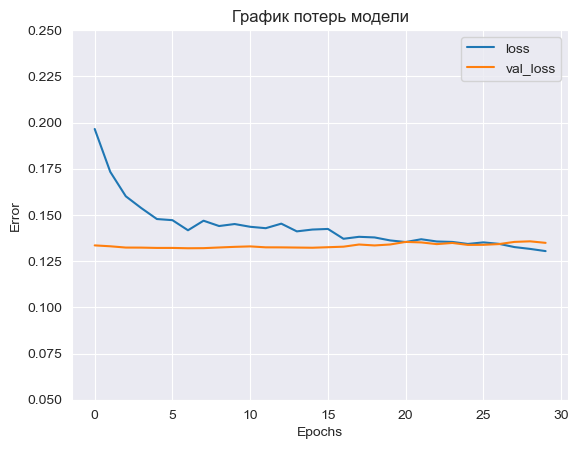

In [199]:
plot_loss(history)